# <CENTER> **PROJECT: Advertising Effectiveness Analysis.**

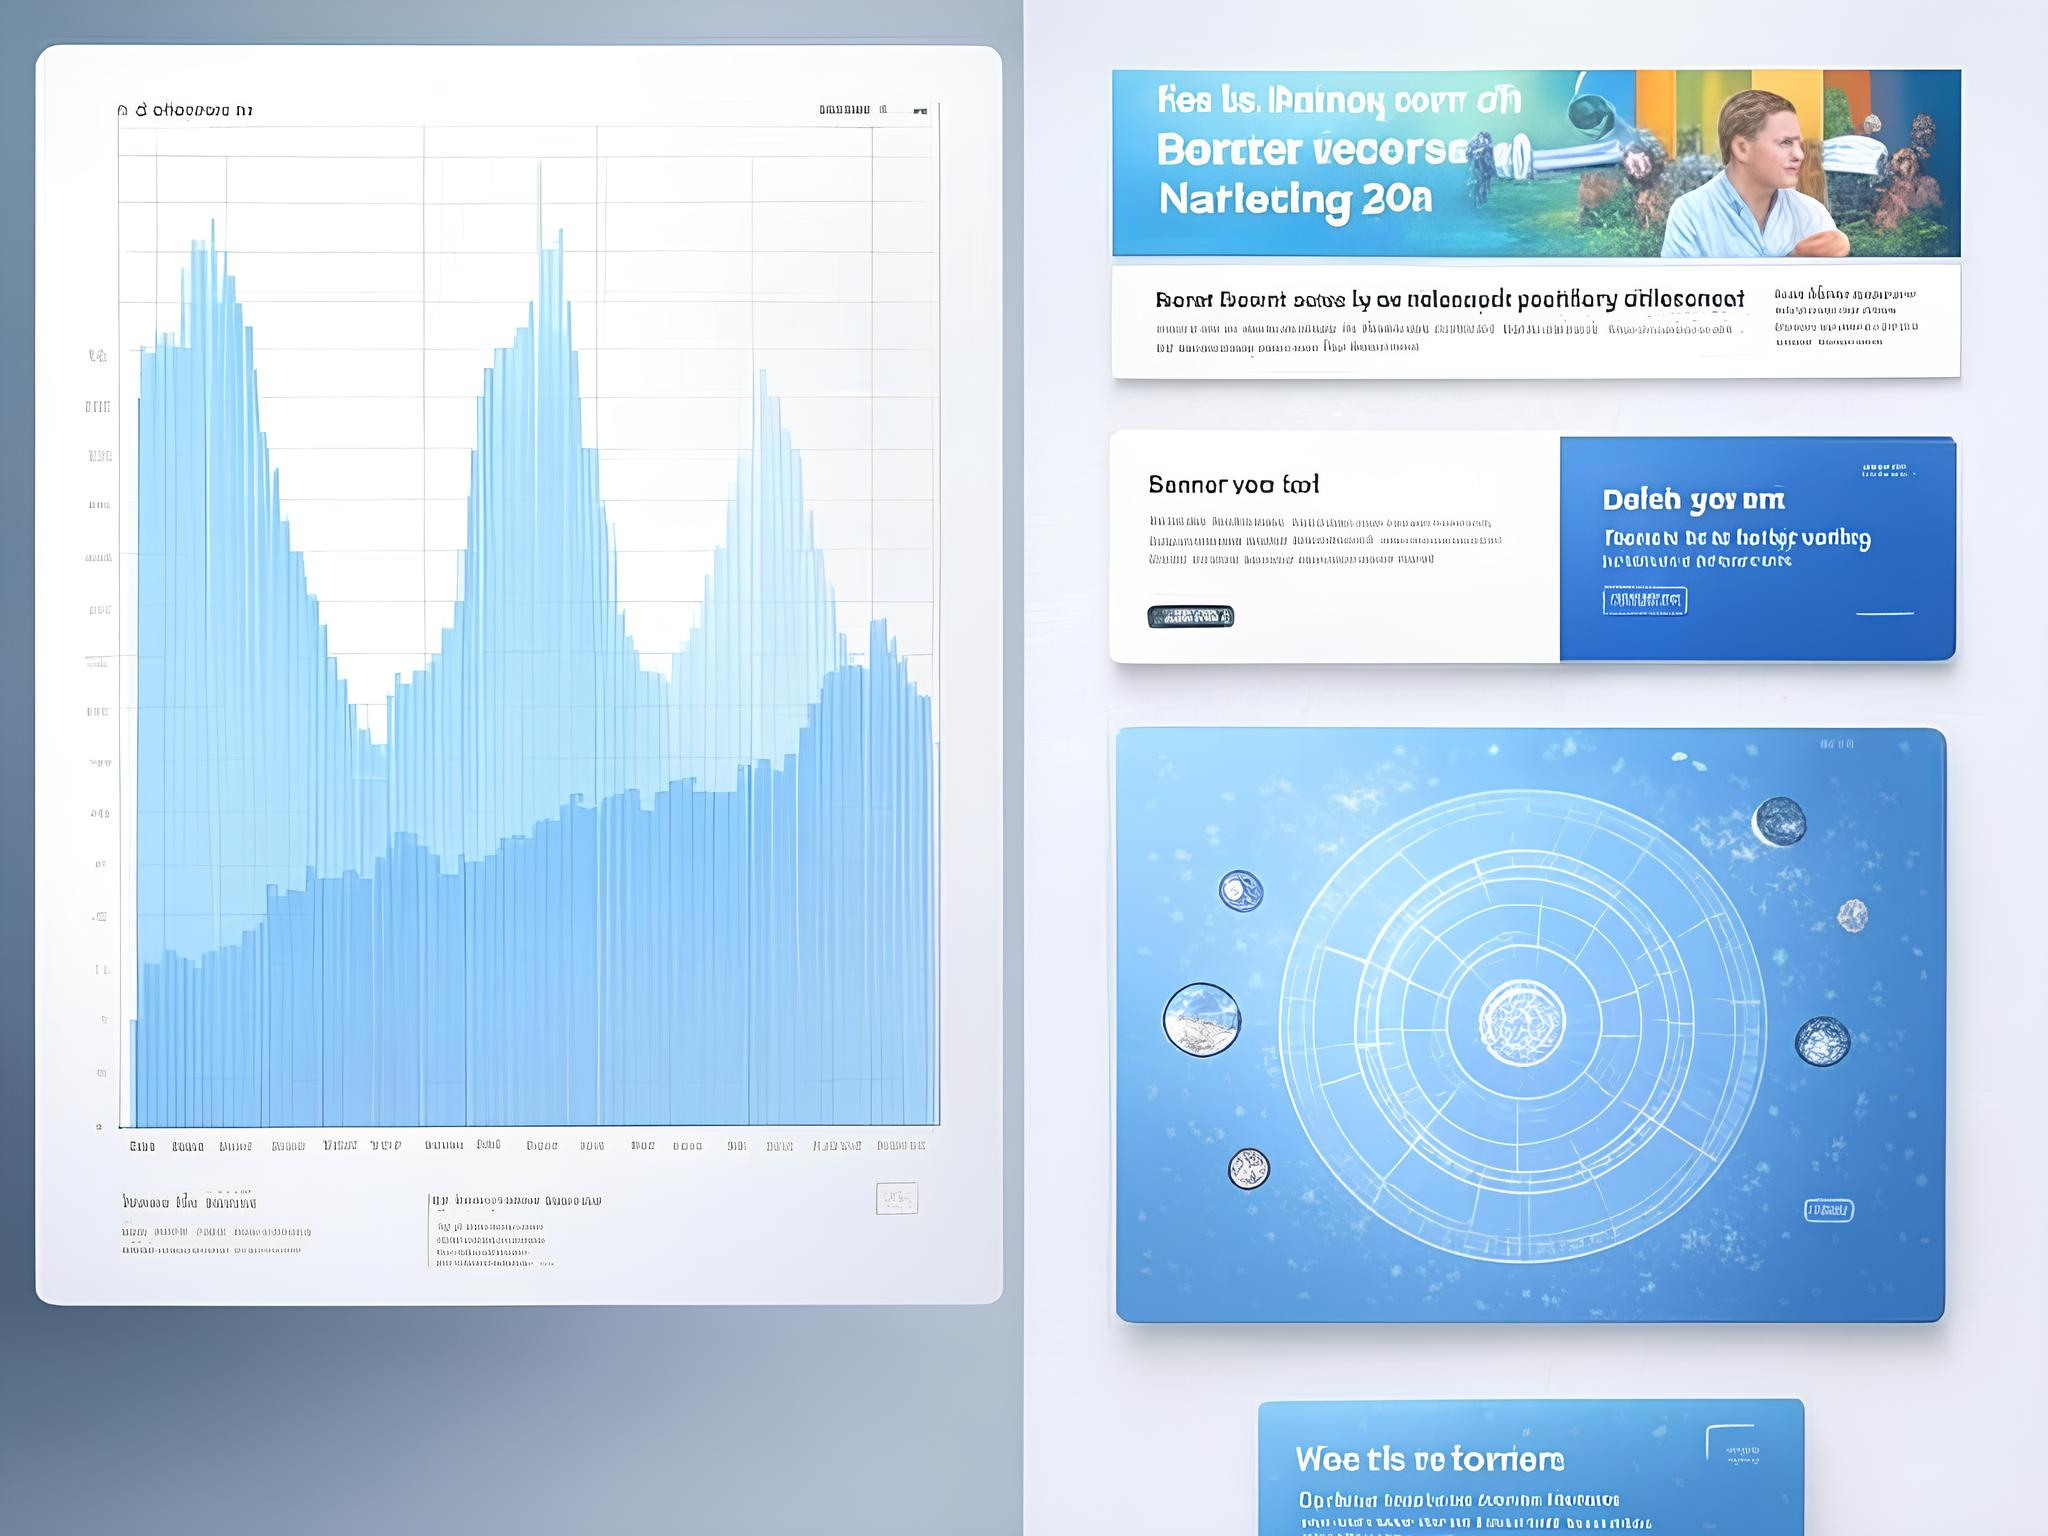

---

#### **Description:**

Marketing agencies want to run successful advertising campaigns, but the market is complex, requiring them to evaluate the effectiveness of different options, which necessitates A/B testing.

**Companies are interested in answers to two questions:**

1. Will the campaign be successful?
2. If the campaign was successful, how much of that success can be attributed to advertising?

To answer the second question, we usually conduct $A/B$ testing.

Most people will see the ad (the treatment group). $A$ small number of people (the control group) will instead see a public service announcement (PSA) (or nothing) of exactly the same size and in the same location as the ad.

---


#### **Problem statement:**

This project requires analyzing the groups to determine whether the advertising was successful, how much the company can earn from advertising, and whether the difference between the groups is statistically significant.

---


#### **Main goals:**

* Generate a data set based on the information sources provided;

* Analyze the data structure and preprocess it;

* Conduct a primary analysis of the $A/B$ testing results;

* Conduct statistical analysis of $A/B$ testing results.

---


#### **Stages of work on the project:**

The project will consist of $5$ parts:

`1.` *Basic analysis and familiarization with data*;

`2.` *Data cleaning*;

`3.` *Initial analysis of $A/B$ testing results*;

`4.` *Statistical Analysis of $A/B$ Testing Results*;

`5.` *General conclusion*.

---

**We import the necessary libraries:**

In [1]:
# To work with data
import numpy as np
import pandas as pd

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt

# To carry out tests
from scipy import stats
from statsmodels.stats import proportion

**Loading data:**

In [2]:
# Loading DataFrame
AB_marketing_data = pd.read_csv('data/marketing_AB.csv')

# Making a copy
AB_marketing_df = AB_marketing_data.copy()

=============================================================================================================================================

## <CENTER> **`1.` Basic analysis and familiarization with data**

At this stage, we will study the information provided.

#### $1.1$

Let's display the information in the table:

In [3]:
# Let's create a function to output information about the dataset
def check_data_inf(data, length1 = None, length2 = None):
    
    # Displaying table sizes
    print('The data has the following dimensions:\n')
    print('Number of lines: {};\nNumber of features (columns): {}.'.format(data.shape[0], data.shape[1]))
    print('-' * length1)

    # Let's output the first five lines
    display(data.head())
    print('-' * length2)
    
    
    
# Displaying information on a DataFrame using the 'check_data_inf' function
check_data_inf(
    data = AB_marketing_df,
    length1 = 40,
    length2 = 85
)

The data has the following dimensions:

Number of lines: 588101;
Number of features (columns): 7.
----------------------------------------


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


-------------------------------------------------------------------------------------


#### **Key Features:**

The data contains $6$ features:

* `user id`: User ID (unique);

* `test group`: If *"ad"*, then the person saw an advertisement, if *"psa"*, then he saw only a public service announcement;

* `converted`: If a person bought the product, then *True*, otherwise *False*;

* `total ads`: The number of advertisements seen by a person;

* `most ads day`: The day on which a person saw the most advertising;

* `most ads hour`: The hour of the day when a person saw the most advertising.

---

#### $1.2$

Let's derive information based on the features:

In [4]:
# Table output
AB_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


Let's calculate the number by type of features:

In [5]:
# Counting the number of features of type 'object', 'int64' and 'float64'   
object_columns_count = AB_marketing_df.select_dtypes(include = ['object']).shape[1]
int64_columns_count = AB_marketing_df.select_dtypes(include = ['int64']).shape[1]
float64_columns_count = AB_marketing_df.select_dtypes(include = ['float64']).shape[1]
bool_columns_count = AB_marketing_df.select_dtypes(include = ['bool']).shape[1]


# Output the result
print('\nThe data presents features of the following types:')
print('-' * 50)
print()

print(f"Number of features of type 'object': {object_columns_count}")
print(f"Number of features of type 'int64': {int64_columns_count}")
print(f"Number of features of type 'float64': {float64_columns_count}")
print(f"Number of features of type 'bool': {bool_columns_count}")
print('-' * 40)


The data presents features of the following types:
--------------------------------------------------

Number of features of type 'object': 2
Number of features of type 'int64': 4
Number of features of type 'float64': 0
Number of features of type 'bool': 1
----------------------------------------


#### $1.3$

Let's derive descriptive characteristics based on the features:

In [6]:
# Output table
AB_marketing_df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


=============================================================================================================================================

## <CENTER> **`2.` Data cleaning**

At this stage, we will identify and clean the data from omissions, duplicates and outliers.

#### $2.1$

**Let's check the data for gaps:**

In [7]:
# Output the total number of skips
print('Total number of gaps in data: {} \n'.format(AB_marketing_df.isnull().sum().sum()))
print('-' * 50)

# Output features with the total number of gaps
print('Information on the number of passes: \n\n{} \n'.format(AB_marketing_df.isnull().sum()))
print('-' * 50)


# Calculate the number of passes
cols_null_persent = AB_marketing_df.isnull().mean() * 100
cols_with_null = cols_null_persent[cols_null_persent > 0].sort_values(ascending = False)
print(f'Information on the number of absences in percentage:\n\n{cols_with_null}')
print('-' * 50)

Total number of gaps in data: 0 

--------------------------------------------------
Information on the number of passes: 

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64 

--------------------------------------------------
Information on the number of absences in percentage:

Series([], dtype: float64)
--------------------------------------------------


#### $2.2$

**Checking data for duplicates:**

In [8]:
# Create a list of features
dupl_columns = list(AB_marketing_df.columns)


# Create a duplicate mask using the duplicated() method and filter it
mask = AB_marketing_df.duplicated(subset = dupl_columns)
train_duplicates = AB_marketing_df[mask]
print(f'Number of duplicates found: {train_duplicates.shape[0]}')

Number of duplicates found: 0


#### $2.3$

The data contains the `Unnamed: 0` flag, which duplicates the indices. Let's remove this variable from the data, since it does not carry useful information:

In [9]:
# Remove the 'Unnamed: 0' feature
AB_marketing_df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)


# Output information on DataFrame using the 'check_data_inf' function
check_data_inf(
    data = AB_marketing_df,
    length1 = 40,
    length2 = 75
)

The data has the following dimensions:

Number of lines: 588101;
Number of features (columns): 6.
----------------------------------------


,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


---------------------------------------------------------------------------


#### $2.4$

Let's check if there are users who were in both groups during the $A/B$ test. If so, we'll exclude users who were in both groups:

In [10]:
# Find users who are in both groups,
# for this we will group the data by 'user id',
# after which we will organize a search for 'user id' that have more than one unique group ('ad' and 'psa')
duplicate_users = AB_marketing_df.groupby('user id').filter(lambda x: x['test group'].nunique() > 1)['user id'].unique()


# We will output the number of users who were included in both groups during the A/B test
print(f'Number of users included in both groups ("ad" and "psa"): {len(duplicate_users)}')

Number of users included in both groups ("ad" and "psa"): 0


Thus, there are no users in the data who are in both groups at the same time.

=============================================================================================================================================

## <CENTER> **`3.` Initial analysis of A/B testing results**

At this stage, we will calculate auxiliary indicators for the control and test groups, as well as key indicators.

#### $3.1$

**Calculation of auxiliary indicators for the control and test groups.**

Let's calculate the number of site visits and the total number of purchases made:

In [11]:
# Count the number of visits (rows) in each group
visits_count = AB_marketing_df.groupby('test group').size()

# We count the number of purchases in each group
purchases_count = AB_marketing_df.groupby('test group')['converted'].sum()


# Create a table with the results
summary_table = pd.DataFrame({
    'Number of visits': visits_count,
    'Number of purchases': purchases_count
}).reset_index()



# Displaying information on a DataFrame using the 'check_data_inf' function
check_data_inf(
    data = summary_table,
    length1 = 40,
    length2 = 60
)

The data has the following dimensions:

Number of lines: 2;
Number of features (columns): 3.
----------------------------------------


,test group,Number of visits,Number of purchases
0,ad,564577,14423
1,psa,23524,420


------------------------------------------------------------


Let's build a visualization:


Boxplot for comparing daily conversion distribution parameters across groups.
---------------------------------------------------------------------------------------------------------------------------


C:\Users\User\AppData\Local\Temp\ipykernel_19428\3738024513.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


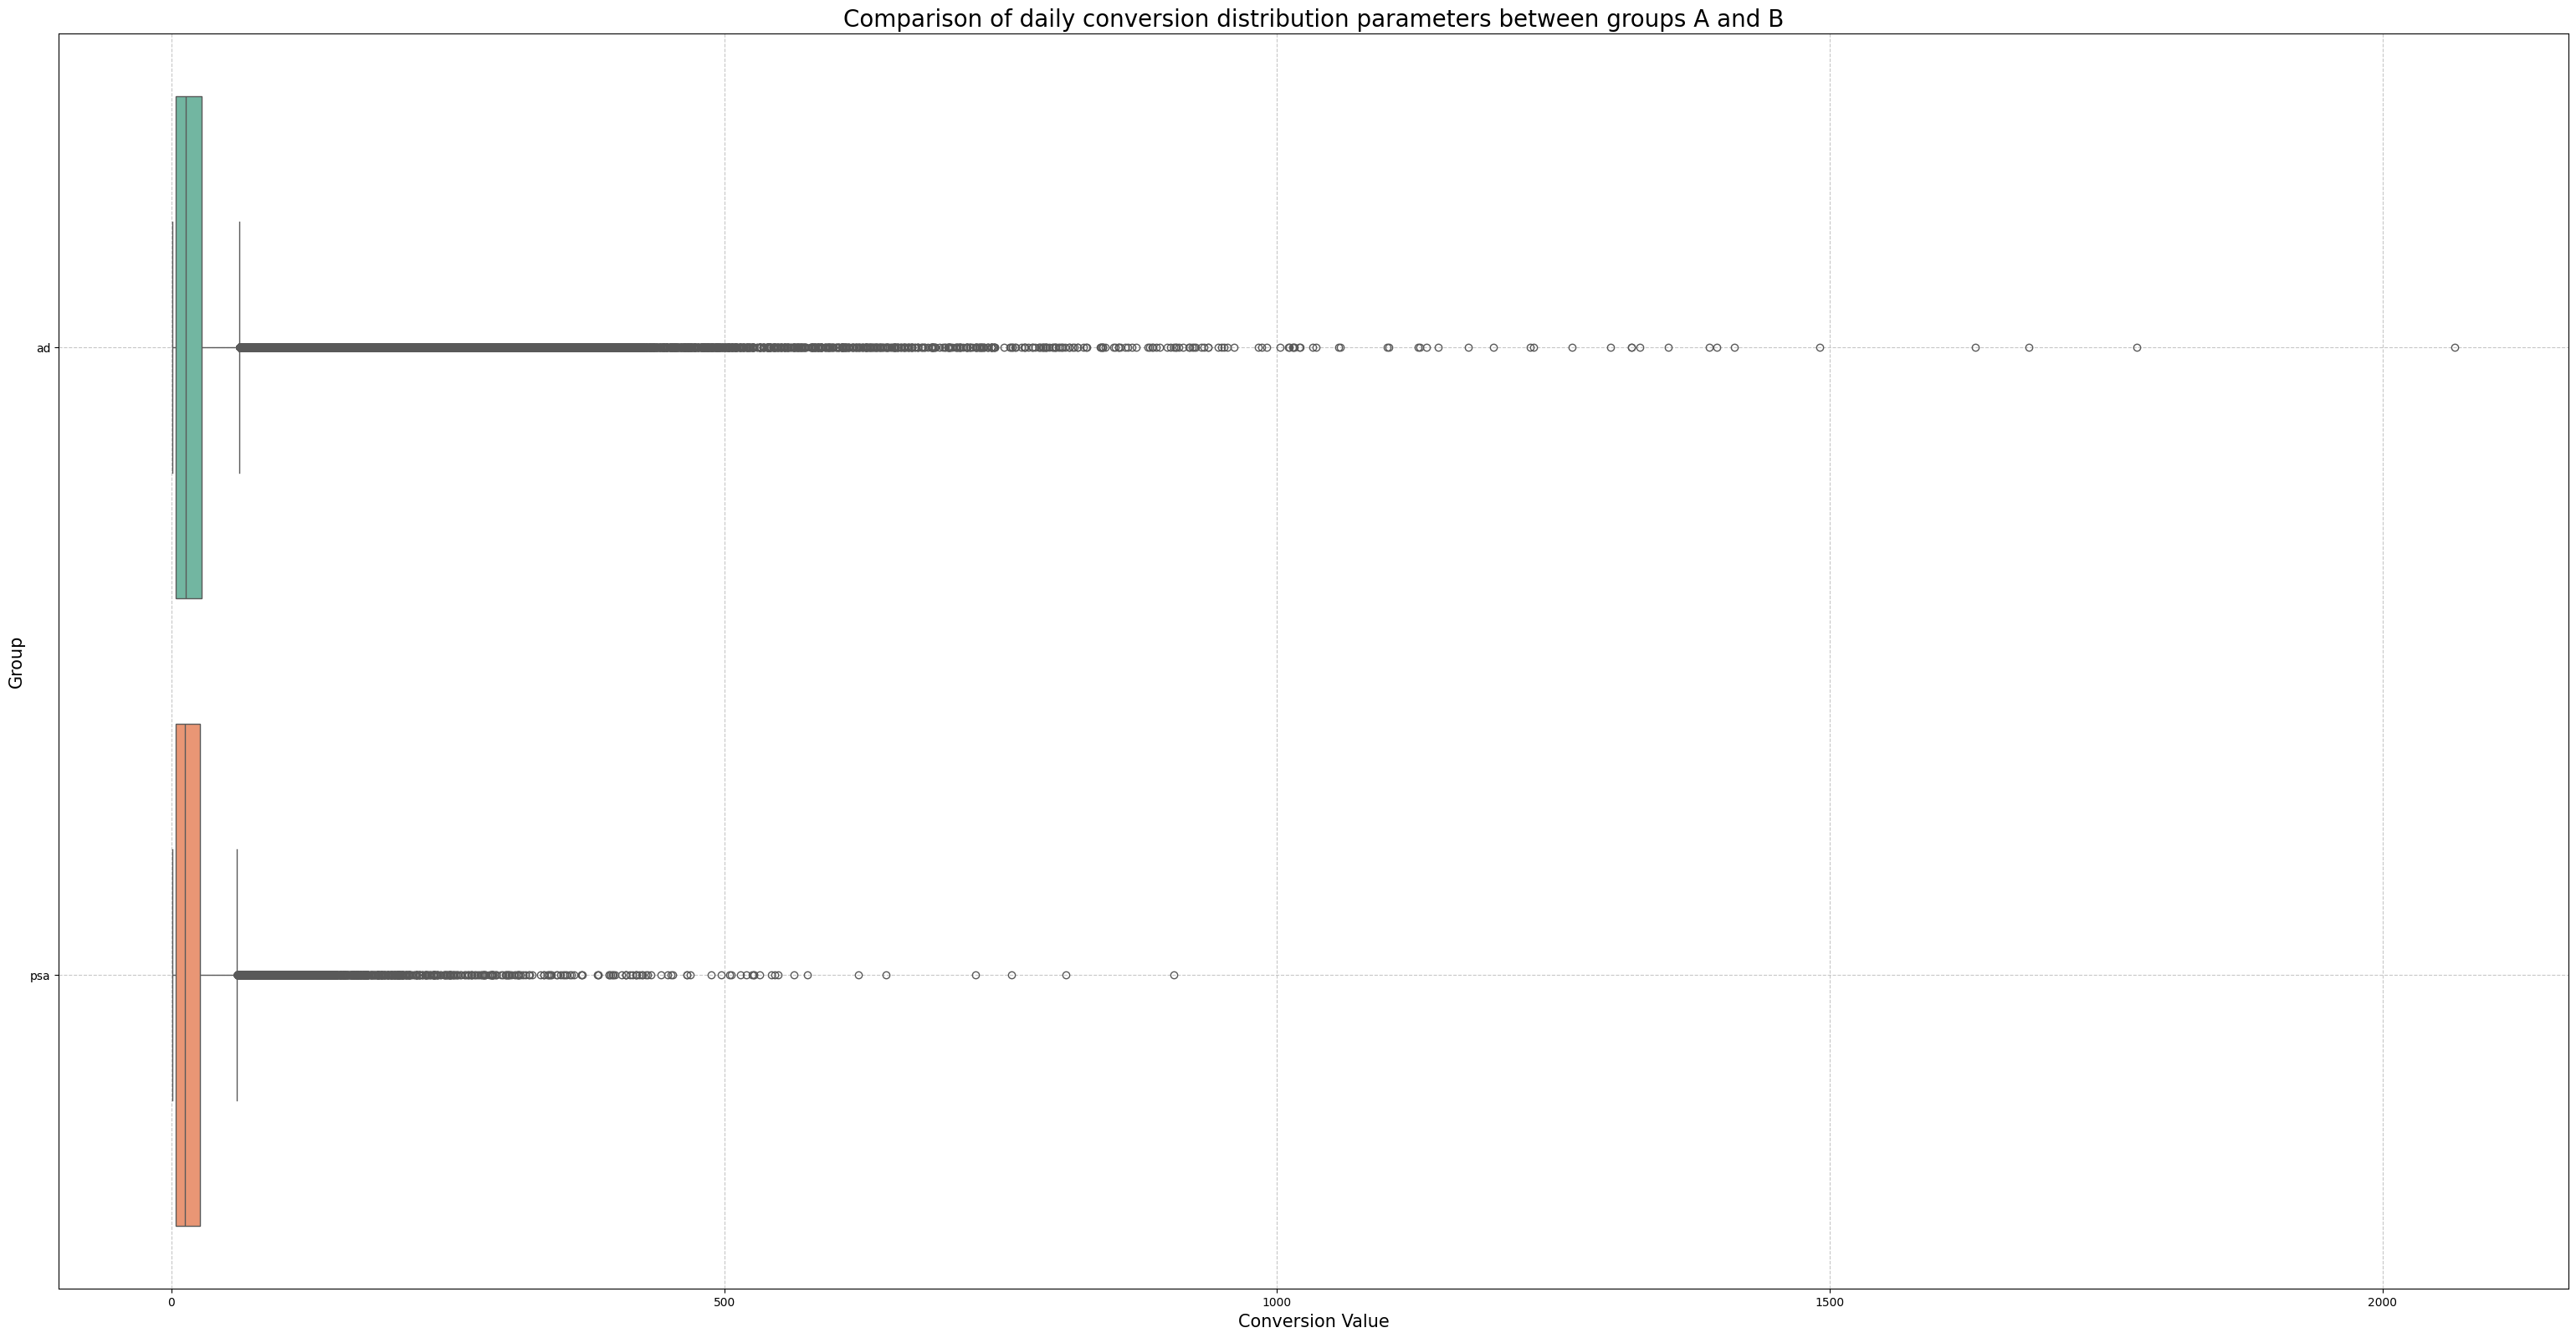

In [13]:
# Set the title of the chart
print('\nBoxplot for comparing daily conversion distribution parameters across groups.')
print('-' * 123)



# Set the size of the graph
fig = plt.figure(figsize = (30, 15)) 

# Add a coordinate system
ax = fig.add_axes([1, 1, 1, 1])


# Build a diagram
sns.boxplot(
    data = AB_marketing_df,
    x = 'total ads',
    y = 'test group',
    palette = 'Set2',
    ax = ax
)


# Set the graph parameters
ax.set_title('Comparison of daily conversion distribution parameters between groups A and B', fontsize = 20)
ax.set_xlabel('Conversion Value', fontsize = 15)
ax.set_ylabel('Group', fontsize = 15)
ax.grid(True, linestyle = '--', alpha = 0.7)

**Conclusions:**

* The number of visits in the *'ad'* group ($564577$) significantly exceeds the number in the *'psa'* group ($23524$). The relative difference is approximately $4.2$%. This is a very small difference in percentage terms, but the absolute number of visits in the *'ad'* group is thousands of times greater than in *'psa'*. Thus, in terms of absolute values, the samples are not comparable.

* The samples cannot be considered balanced due to the huge imbalance in the number of visits ($564,577$ vs. $23,524$). This may affect the reliability of the $A/B$ test results.

For a more accurate analysis, it is recommended to balance the samples (for example, randomly select $23524$ users from the *'ad'* group to compare with the *'psa'* group).

Let's analyze the distribution of the `most ads day` and `most ads hour` features for the *'ad'* and *'psa'* groups to assess their homogeneity. To do this, we'll plot graphs that will help us visually compare the distributions.

We build a distribution graph by days (`most ads day`):


Distribution graph by days when the user saw the largest number of advertisements.
---------------------------------------------------------------------------------------------------------------------------


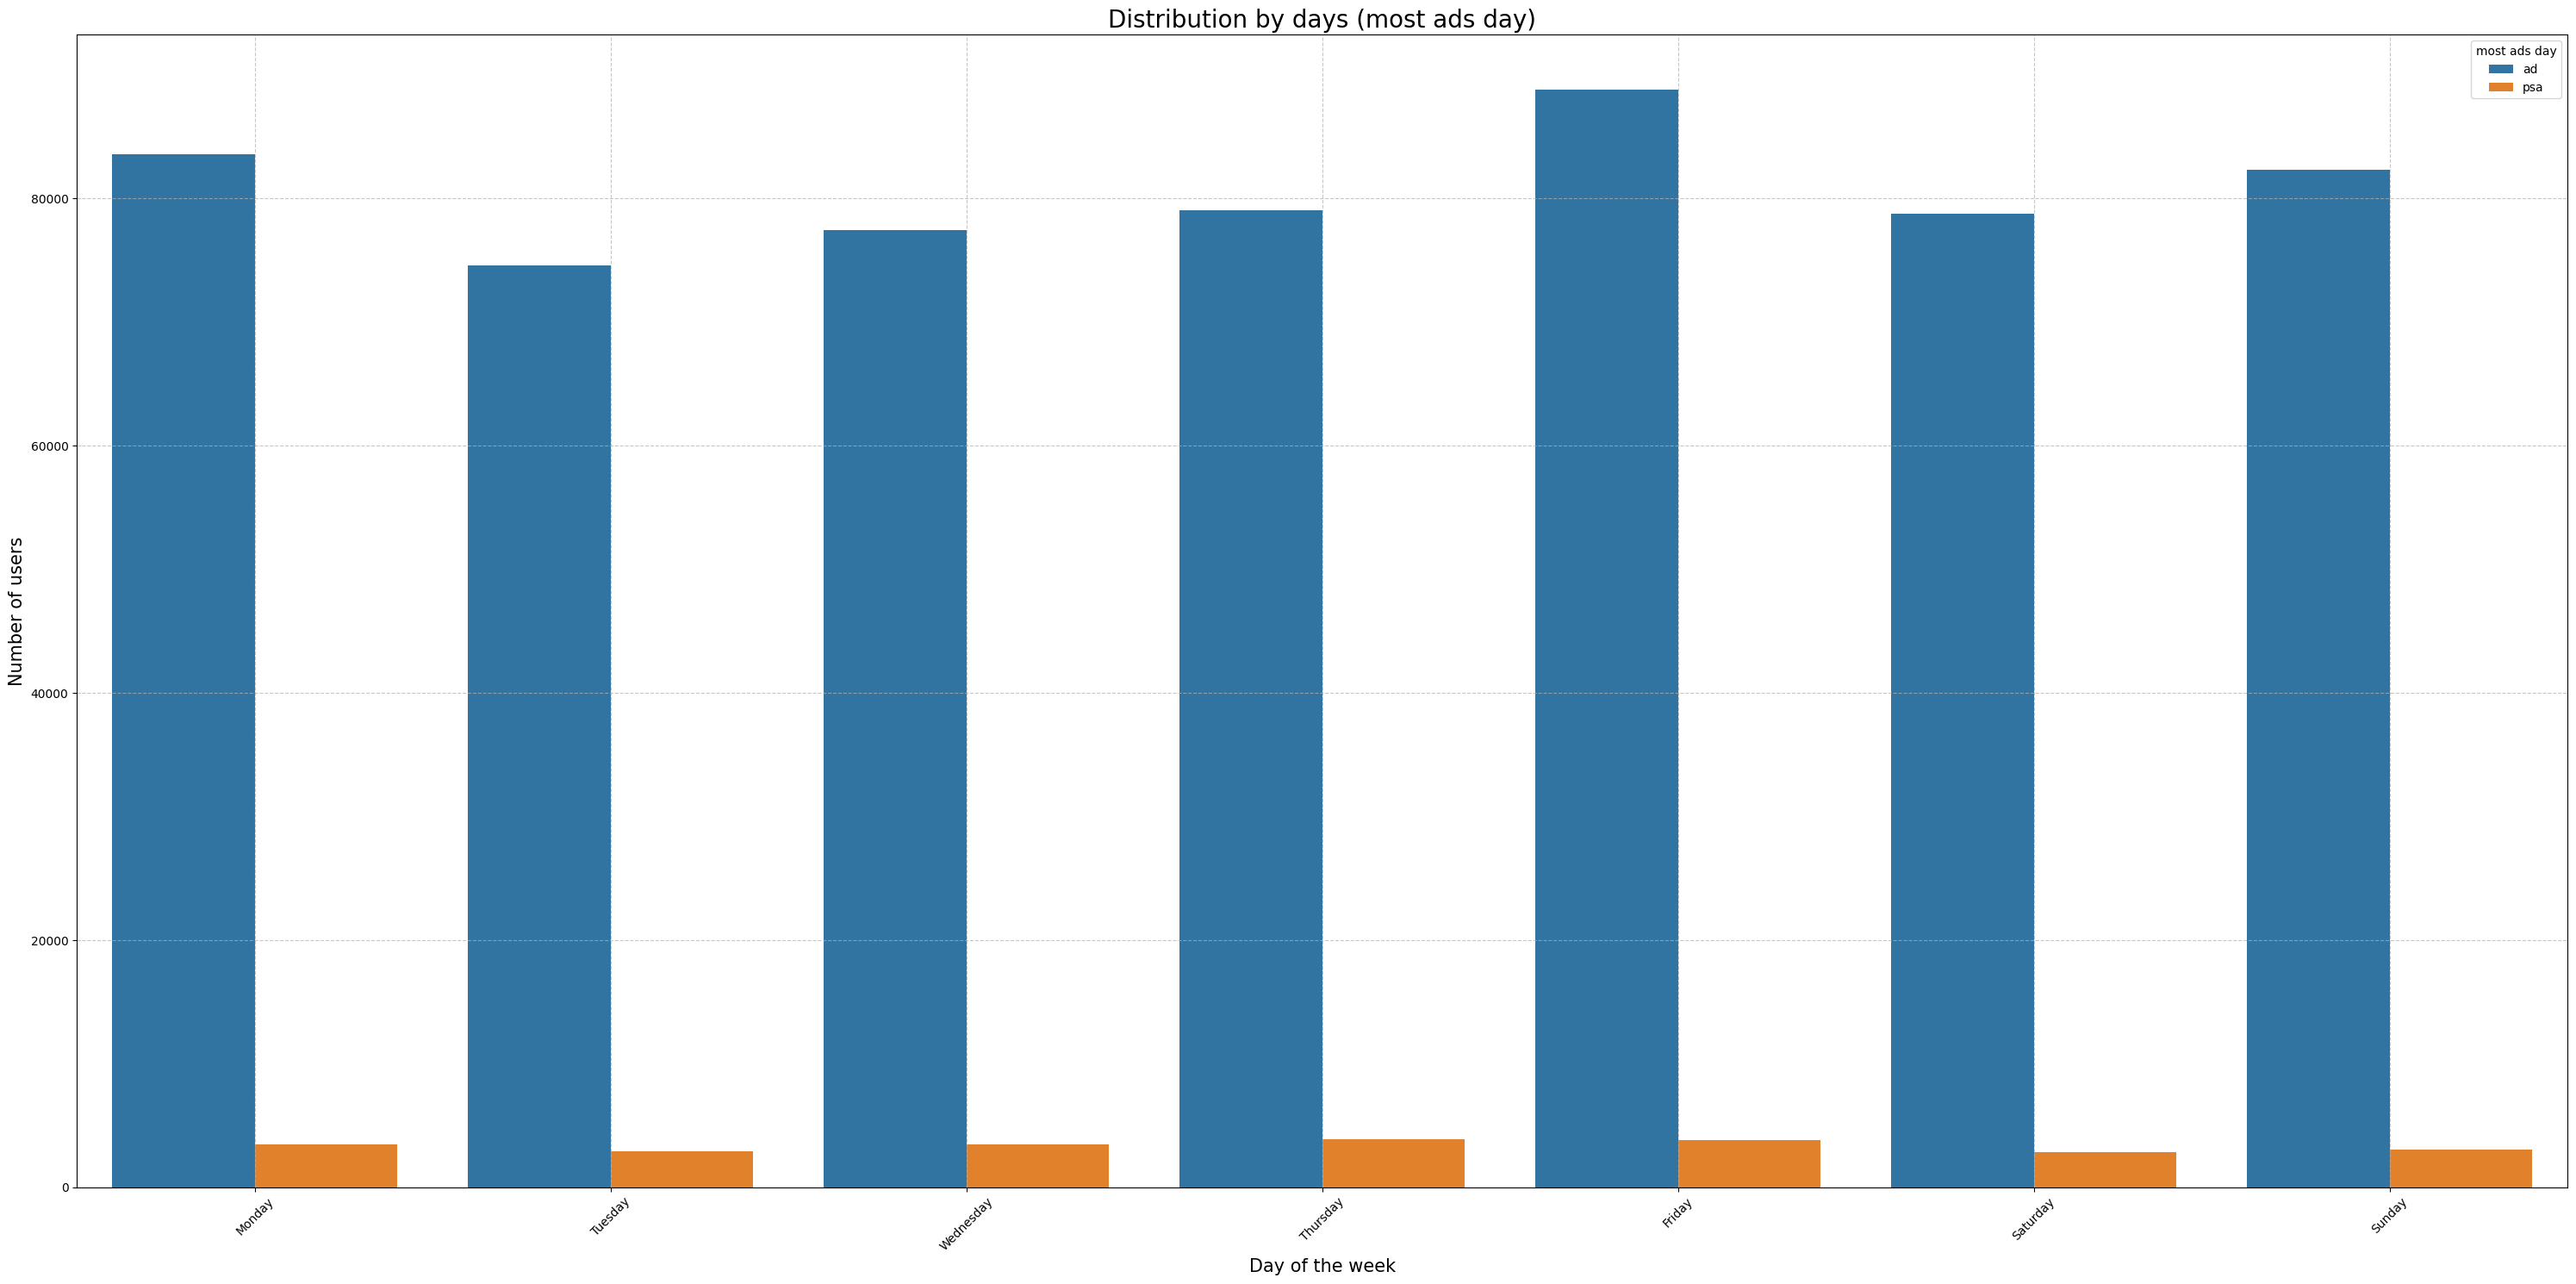

---------------------------------------------------------------------------------------------------------------------------


In [14]:
# Set the title of the chart
print('\nDistribution graph by days when the user saw the largest number of advertisements.')
print('-' * 123)


# Set the graph dimensions
plt.rcParams['figure.figsize'] = (30, 15)


# Create a graph
sns.countplot(
    data = AB_marketing_df,
    x = 'most ads day',
    hue = 'test group',
    order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)


# Set the style of the graph
plt.title('Distribution by days (most ads day)', fontsize = 20)
plt.xlabel('Day of the week', fontsize = 15)
plt.ylabel('Number of users', fontsize = 15)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.xticks(rotation = 45)
plt.legend(title = 'most ads day')
plt.tight_layout()



# Output the graph
plt.show()
print('-' * 123)

**Conclusion:**

The day distributions are similar in both groups, with Friday dominating and Tuesday being the least popular. However, the huge difference in sample sizes ($564,577$ vs. $23,524$) makes it difficult to talk about complete homogeneity. In percentage terms, the groups look similar, but the absolute values ​​are very different.

We build a distribution graph by hours (`most ads hour`):


Graph of distribution by hours during which the user saw the largest number of advertisements.
---------------------------------------------------------------------------------------------------------------------------


C:\Users\User\AppData\Local\Temp\ipykernel_19428\2958844853.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = 'most ads hour')


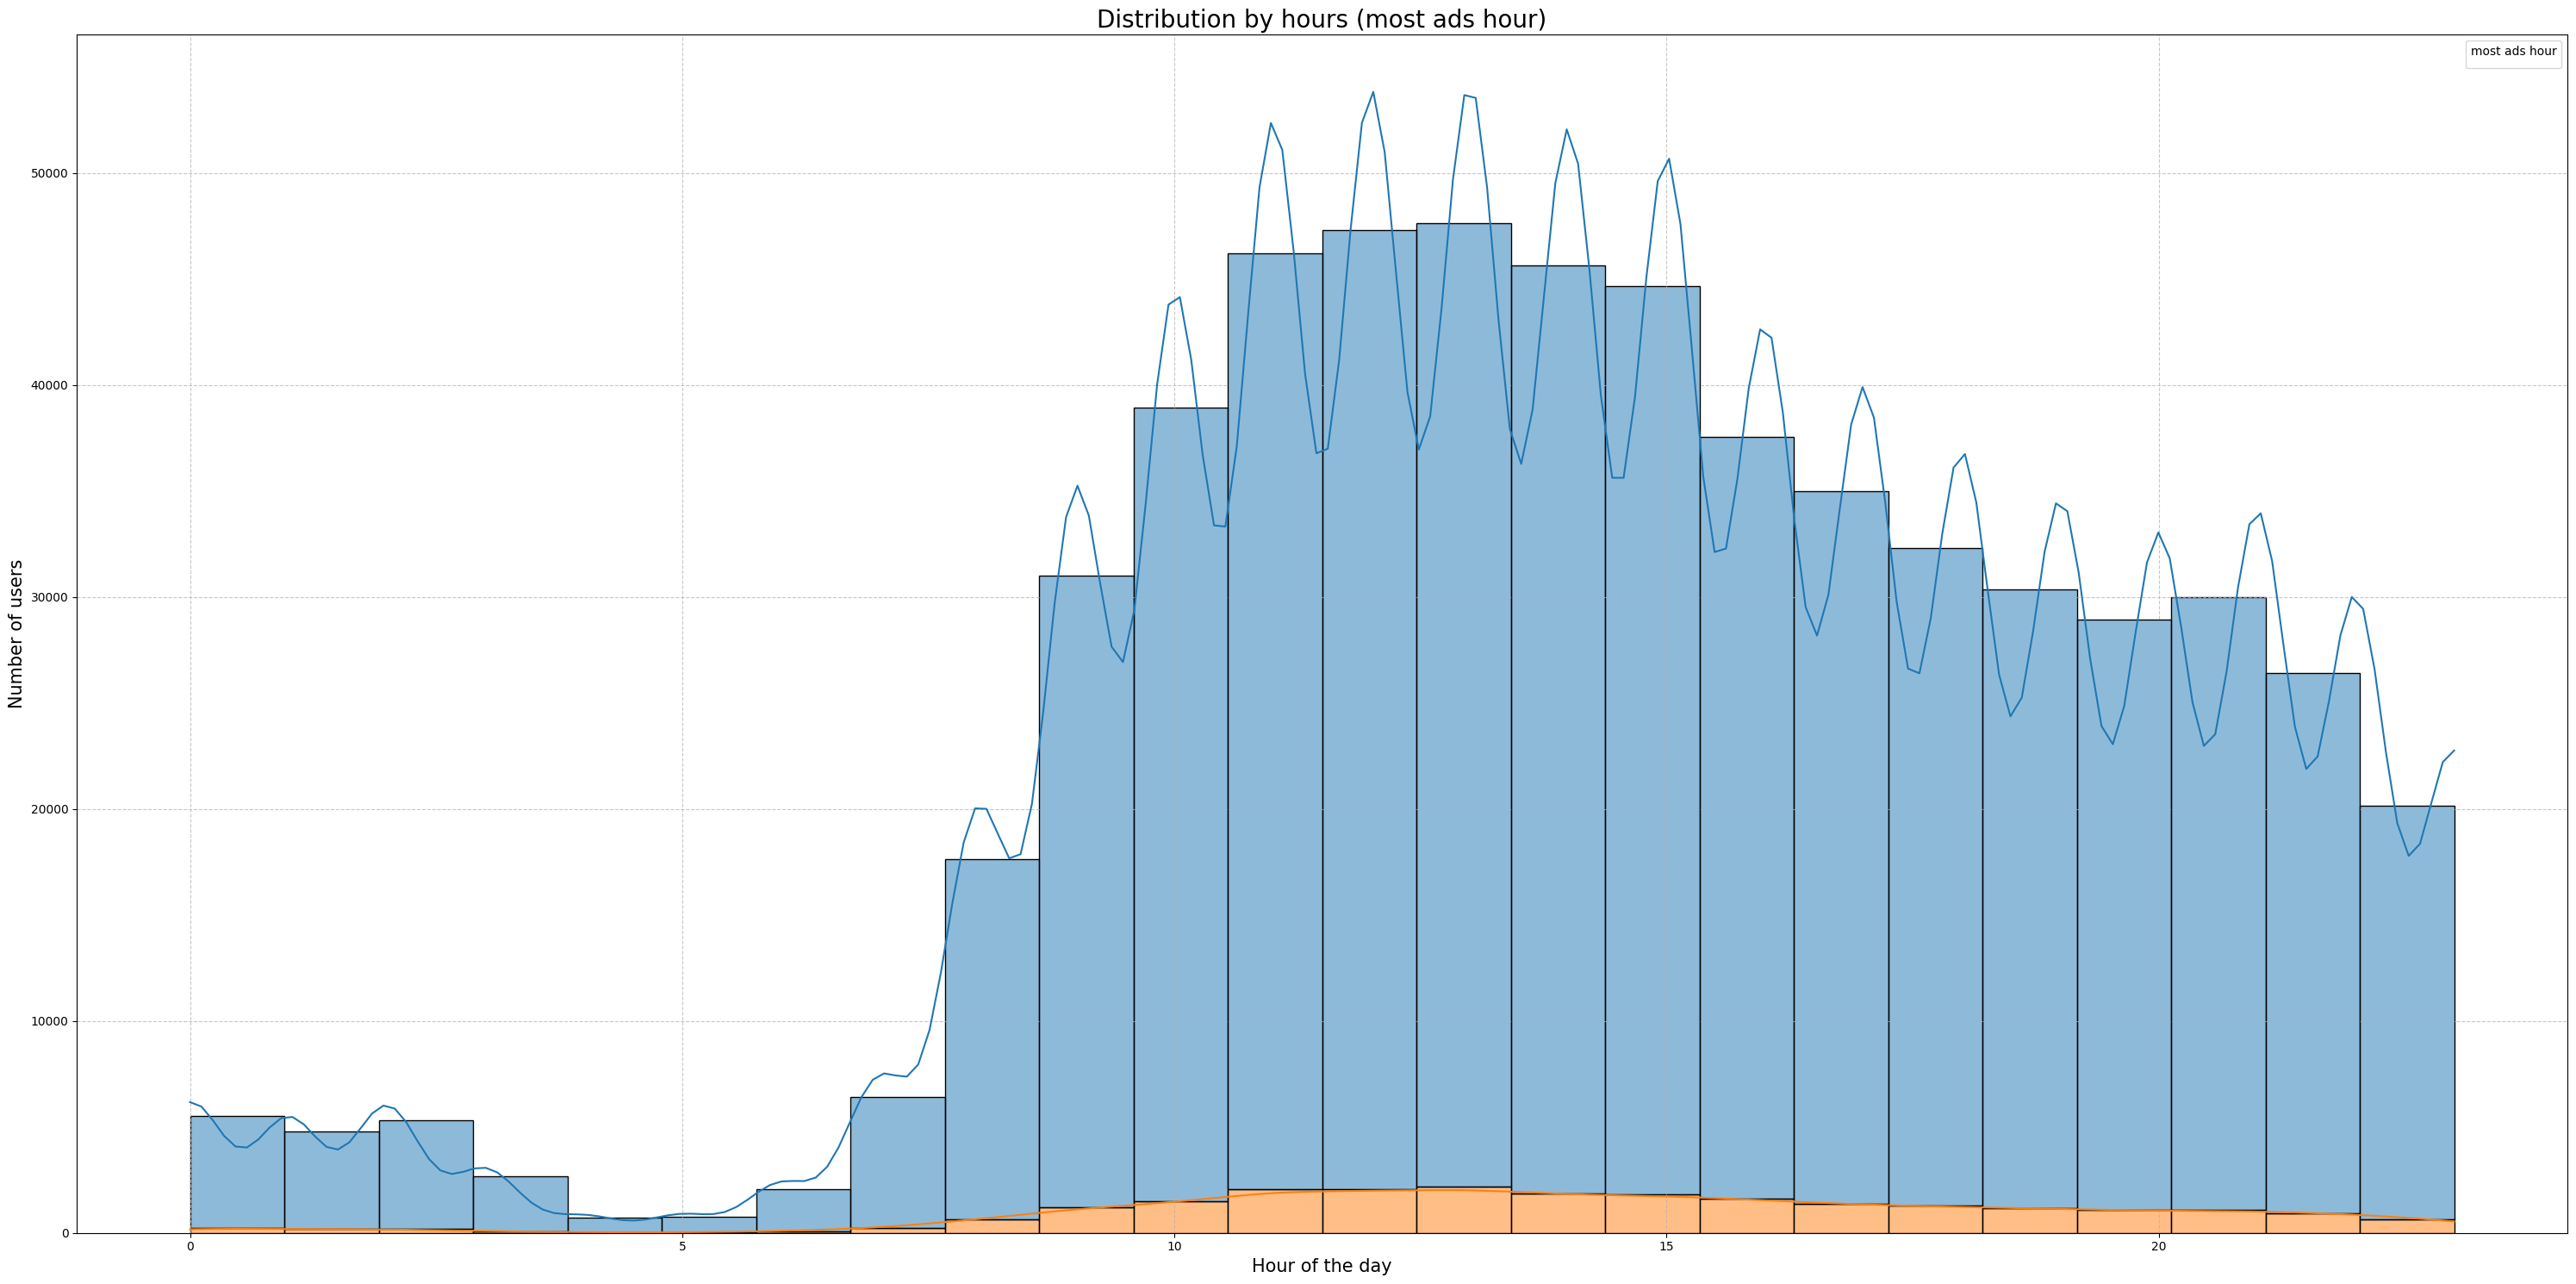

---------------------------------------------------------------------------------------------------------------------------


In [15]:
# Set the title of the chart
print('\nGraph of distribution by hours during which the user saw the largest number of advertisements.')
print('-' * 123)


# Set the graph dimensions
plt.rcParams['figure.figsize'] = (30, 15)


# Create a graph
sns.histplot(
    data = AB_marketing_df,
    x = 'most ads hour',
    hue = 'test group',
    multiple = 'stack',
    bins = 24,
    kde = True
)


# Set the style of the graph
plt.title('Distribution by hours (most ads hour)', fontsize = 20)
plt.xlabel('Hour of the day', fontsize = 15)
plt.ylabel('Number of users', fontsize = 15)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(title = 'most ads hour')
plt.tight_layout()


# Выводим график
plt.show()
print('-' * 123)

**Conclusion:**

The distribution by hours is also similar, with both groups showing a peak at $1$:$00$ p.m. and low activity in the early hours. This suggests that user behavior in both groups is similar by time of day.

#### $3.2$

**Calculation of key indicators for the control and test groups.**

First, let's divide the data into groups:

In [16]:
# Separate data into groups 'ad' and 'psa'
ad_group = AB_marketing_df[AB_marketing_df['test group'] == 'ad']
psa_group = AB_marketing_df[AB_marketing_df['test group'] == 'psa']


# Let's derive the dimensions of the groups
print(f'Group size "ab": {ad_group.shape}')
print(f'Group size "psa": {psa_group.shape}')

Group size "ab": (564577, 6)
Group size "psa": (23524, 6)


Let's build a visualization of the distributions of both samples:


Distribution graph of samples A (ad) and B (psa):
---------------------------------------------------------------------------------------------------------------------------


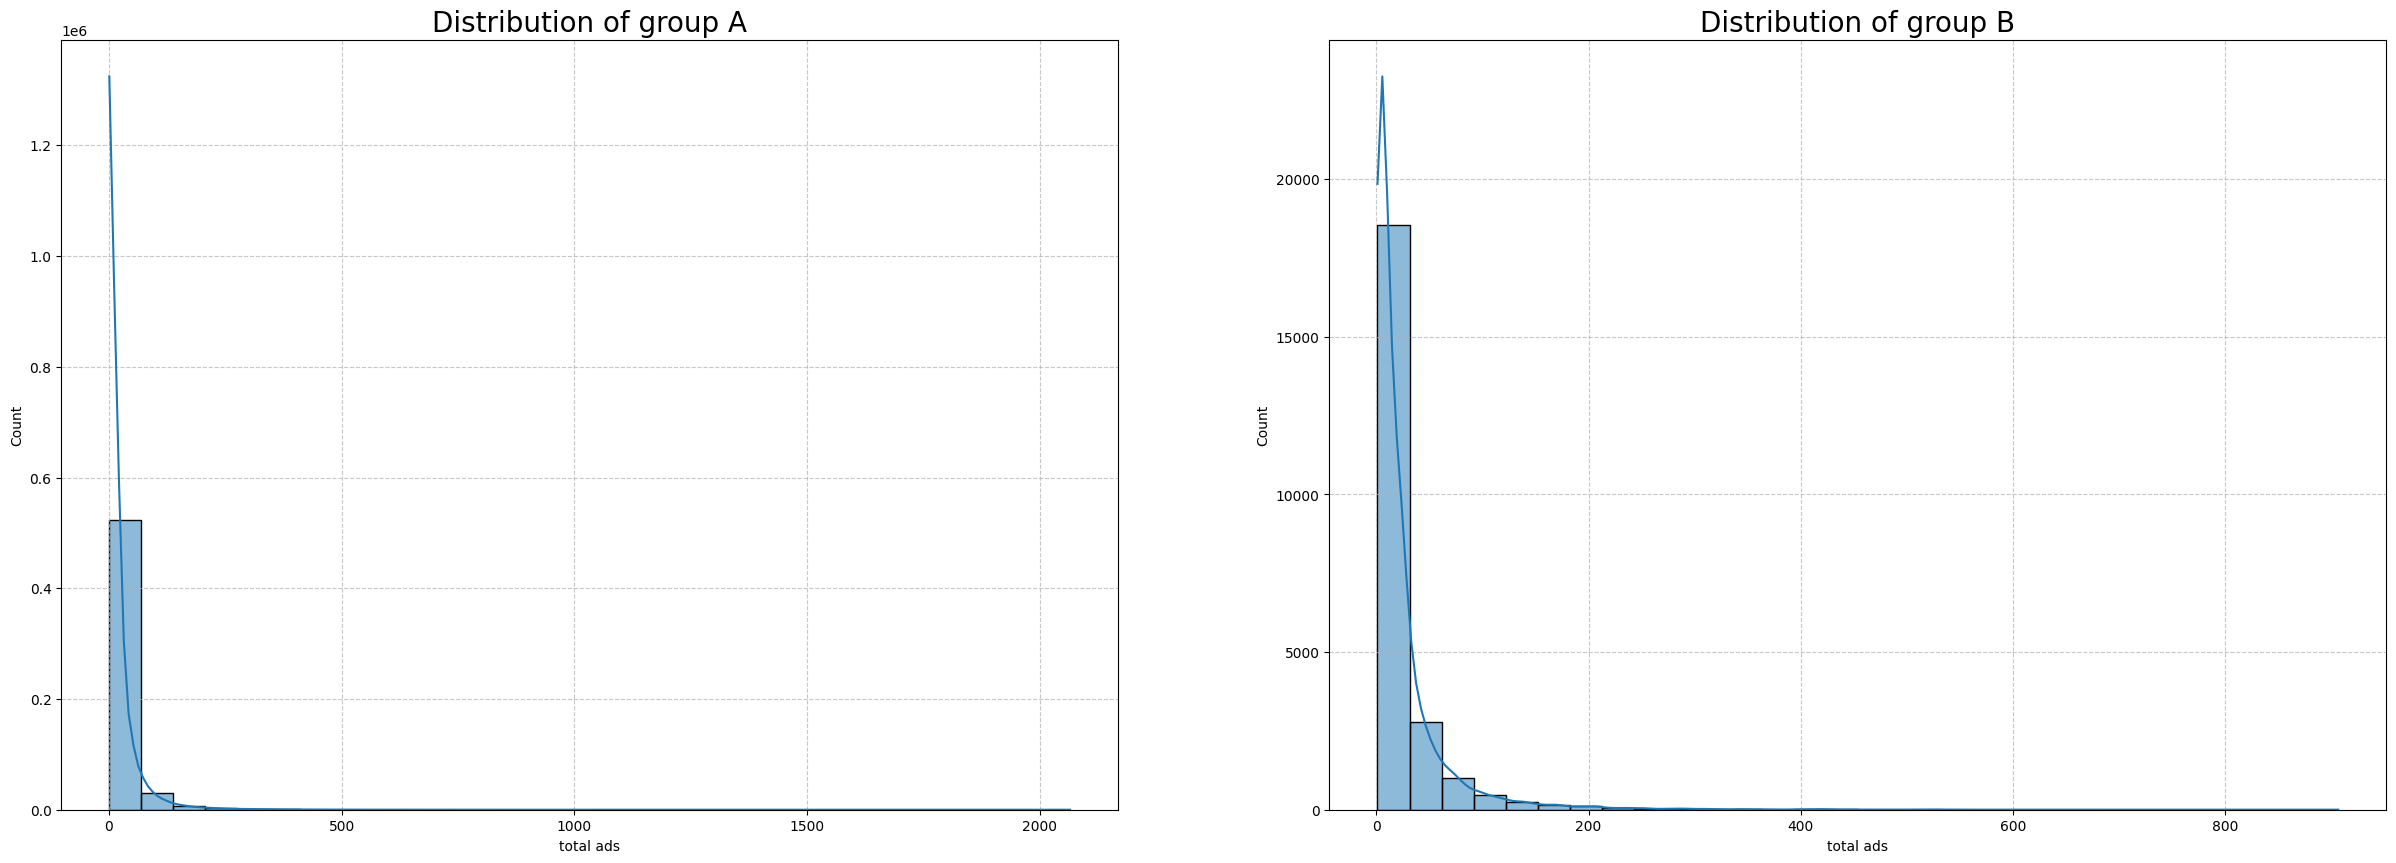

In [18]:
# Set the title of the chart
print('\nDistribution graph of samples A (ad) and B (psa):')
print('-' * 123)



# Set the size for two graphs
fig, axes = plt.subplots(1, 2, figsize = (30, 10))



# Building histograms
sns.histplot(
    data = ad_group, 
    x = 'total ads',
    bins = 30,
    kde = True,
    ax = axes[0]
)

sns.histplot(
    data = psa_group,
    x = 'total ads',
    bins = 30,
    kde = True,
    ax = axes[1]
)



# Set the parameters of the first graph
axes[0].set_title('Distribution of group A', fontsize = 20)
axes[0].grid(True, linestyle = '--', alpha = 0.7)

# Set the parameters of the second graph
axes[1].set_title('Distribution of group B', fontsize = 20)
axes[1].grid(True, linestyle = '--', alpha = 0.7)

**Conclusion:**

The histograms show that the distributions for groups $A$ (*'ad'*) and $B$ (*'psa'*) are skewed to the right with peaks around $0$–$10$. Group $A$ has a higher density at low values, while group $B$ has a longer right tail.

Let's calculate the conversion and the average number of ads seen by the user:

In [19]:
# Calculate conversion
conversion_ad = (ad_group['converted'].sum() / len(ad_group)) * 100
conversion_psa = (psa_group['converted'].sum() / len(psa_group)) * 100

# Calculate the average amount of advertising
avg_ads_ad = ad_group['total ads'].mean()
avg_ads_psa = psa_group['total ads'].mean()


# Create a table with the results
summary_table = pd.DataFrame({
    'Group': ['ad', 'psa'],
    'Conversion (%)': [conversion_ad, conversion_psa],
    'Average number of advertisements': [avg_ads_ad, avg_ads_psa]
})



# Output information on DataFrame using the 'check_data_inf' function
check_data_inf(
    data = summary_table,
    length1 = 40,
    length2 = 55
)

The data has the following dimensions:

Number of lines: 2;
Number of features (columns): 3.
----------------------------------------


,Group,Conversion (%),Average number of advertisements
0,ad,2.554656,24.823365
1,psa,1.785411,24.761138


-------------------------------------------------------


Let's build a visualization:


Graph comparing conversion and average number of ads by groups.
---------------------------------------------------------------------------------------------------------------------------


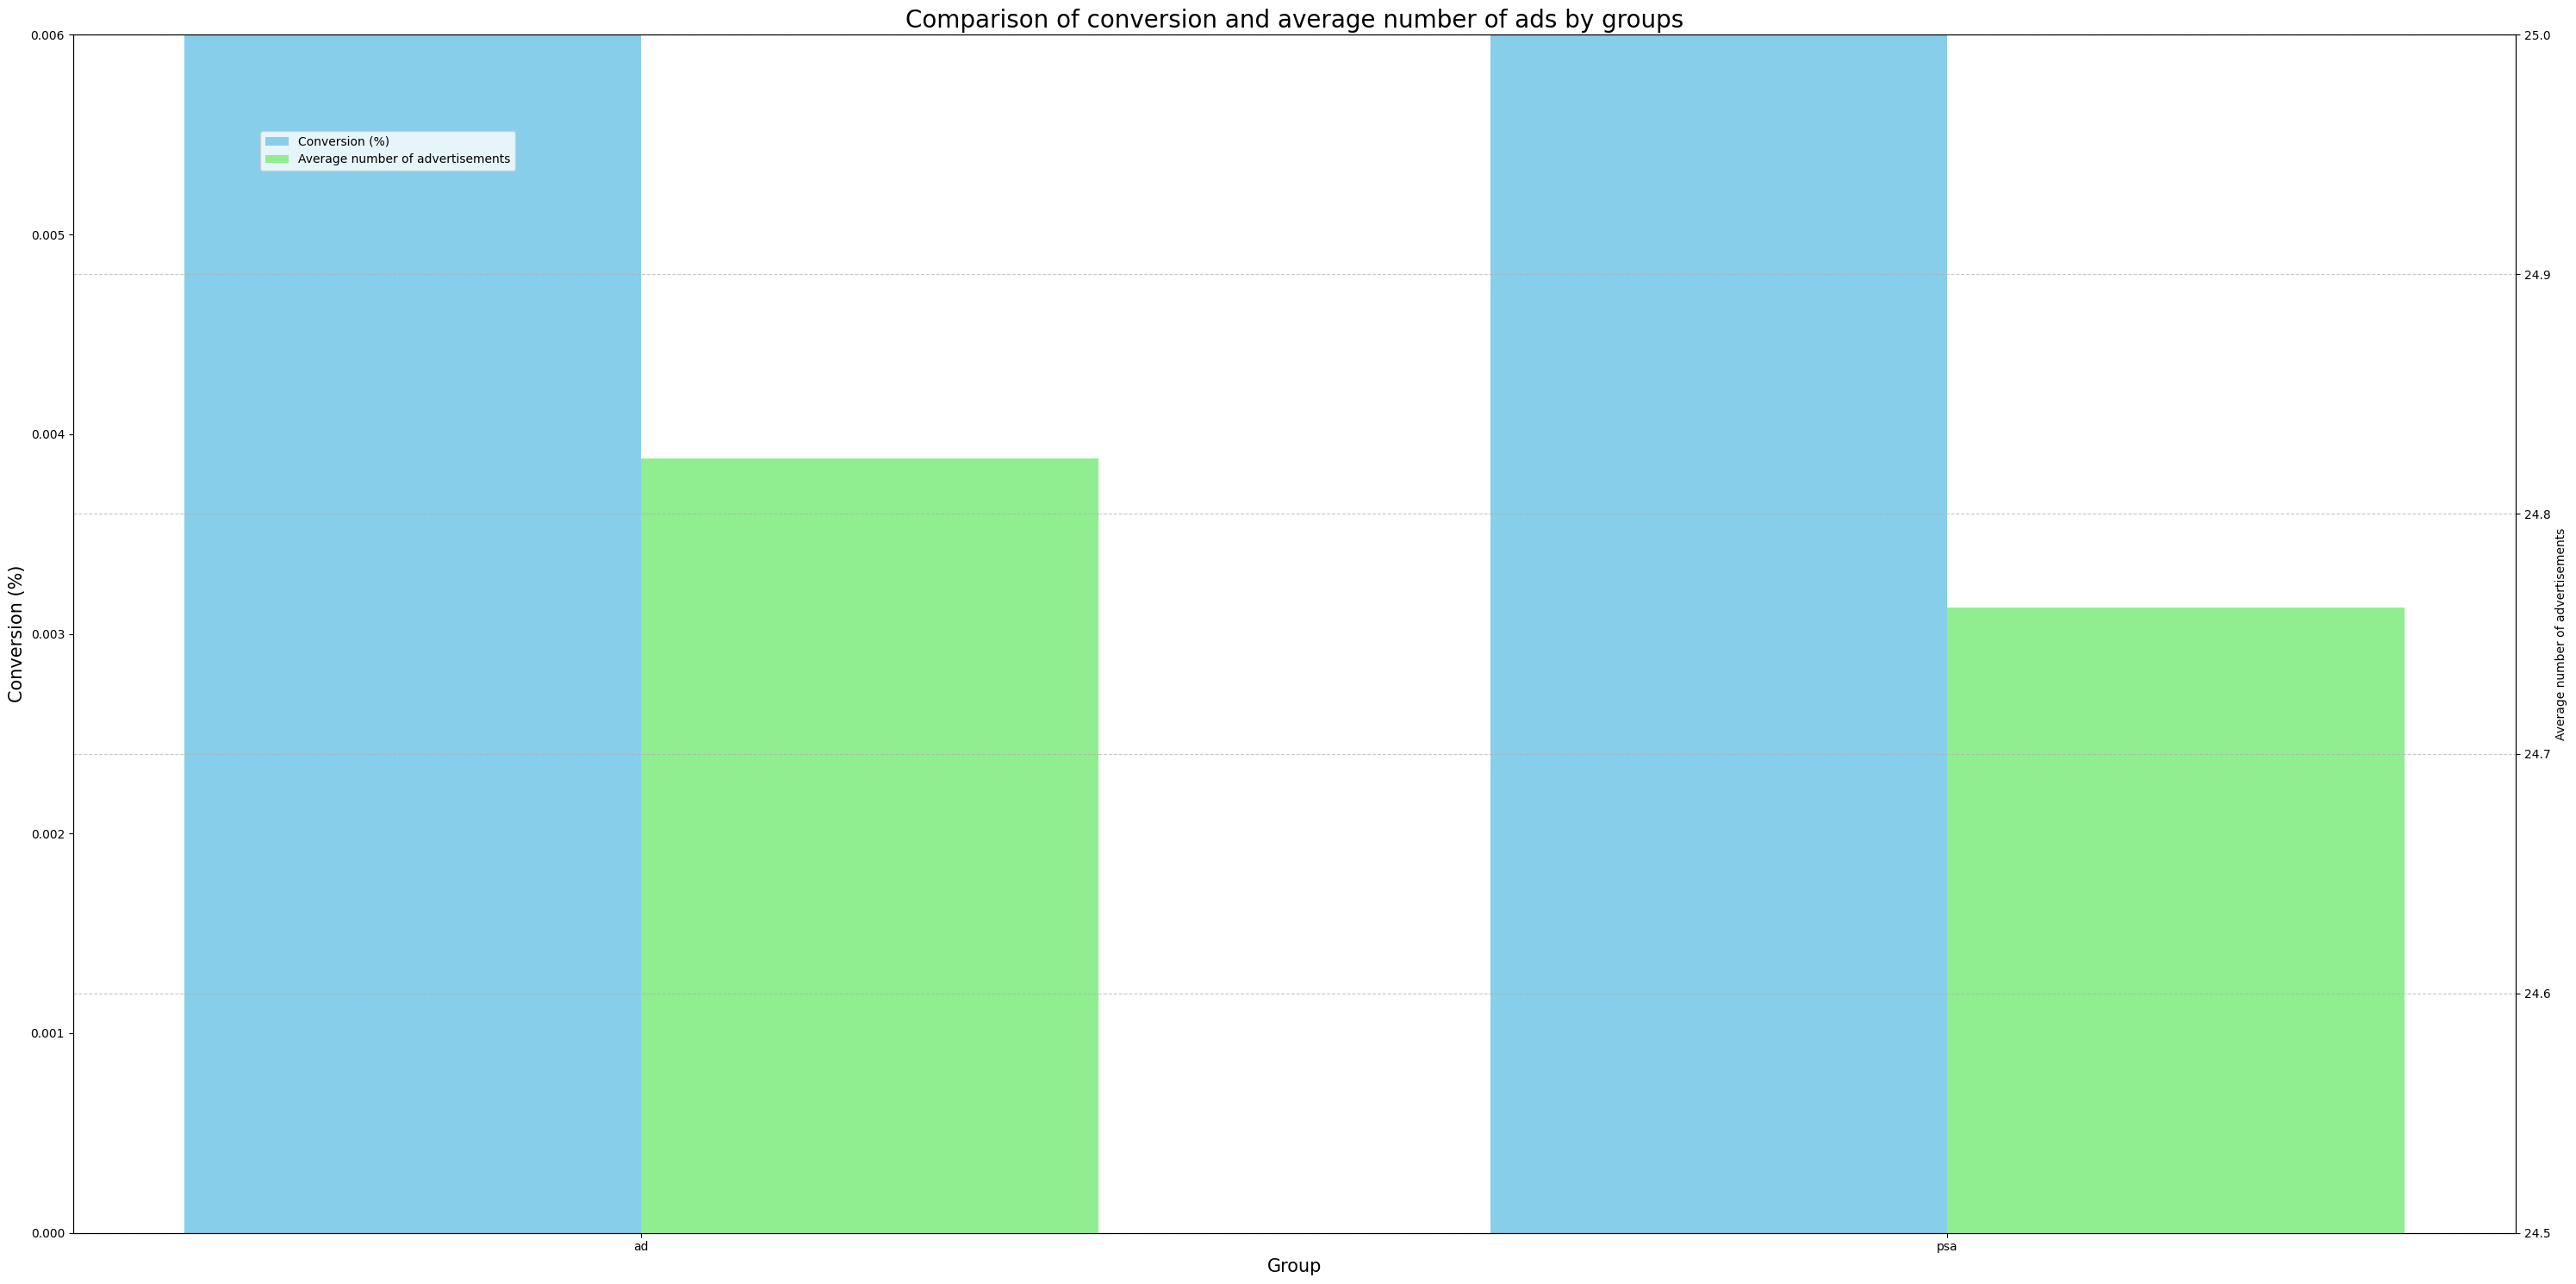

---------------------------------------------------------------------------------------------------------------------------


In [20]:
# Set the title of the chart
print('\nGraph comparing conversion and average number of ads by groups.')
print('-' * 123)



# Set the data
groups_list = ['ad', 'psa']
conversion_list = [2.554656, 1.785411]
avg_ads = [24.823365, 24.761138]


# Set the column width
bar_width = 0.35
index = np.arange(len(groups_list))



# Set the size of the graph
fig, ax1 = plt.subplots(figsize = (30, 15))

# Columns for conversion (left Y axis)
ax1.bar(index, conversion_list, bar_width, label='Conversion (%)', color='skyblue')
ax1.set_xlabel('Group', fontsize = 15)
ax1.set_ylabel('Conversion (%)', color='black', fontsize = 15)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 0.006) 

# Create a second Y axis for the average number of ads
ax2 = ax1.twinx()
ax2.bar(index + bar_width, avg_ads, bar_width, label='Average number of advertisements', color='lightgreen')
ax2.set_ylabel('Average number of advertisements', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(24.5, 25.0)

# Set the style of the graph
plt.title('Comparison of conversion and average number of ads by groups', fontsize = 20)
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(groups_list)
plt.grid(True, linestyle = '--', alpha = 0.7)
fig.tight_layout()

# Adding a legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))



# Output the graph
plt.show()
print('-' * 123)

**Conclusions:**

* At first glance, option $A$ (*'ad'*) is more effective than option $B$ (*'psa'*) in terms of conversion, since there are more purchases in the *'ad'* group than in the *'psa'* group.

* The difference in average number of ads is minimal (approximately $2.6$ impressions per user). This means that both groups saw roughly the same number of ads, and by this metric, neither option appears to be more effective than the other.

In terms of efficiency, option $A$ (*'ad'*) is more efficient in terms of conversion: The *'ad'* group has a slightly higher conversion value than *'psa'* ($2.6$ versus $1.8$). This suggests that the ad (option $A$) was slightly better at stimulating purchases, compared to the public service announcements (option $B$).

======================================================================================================================================

## <CENTER> **`4.` Statistical Analysis of A/B Testing Results**

At this stage, we will formulate and test statistical hypotheses, conduct tests and construct confidence intervals.

#### $4.1$

**Formulation of statistical hypotheses and selection of a statistical test to test them.**

Let's formulate statistical hypotheses and select appropriate tests for data analysis in accordance with the business questions posed:

1. Was the advertisement successful?
2. How much can a company earn from advertising?
3. Is the difference between groups statistically significant?

---

##### **1. Was the advertising successful?**

* **Statistical hypotheses:**

    * $H_0$: Conversion in the *'ad'* group is no different from conversion in the *'psa'* group (advertising had no effect);

    * $​H_1$: Conversion in the *'ad'* group is higher than in the *'psa'* group (the advertising was successful).

* **Test selection:**

Since we are comparing proportions (conversions) between two independent groups, we use the **$Z$-test for proportions**.

* **Normality check:**

The $Z$-test does not require normality because it is based on asymptotic approximation and works with large samples.

---

##### **2. How much can a company earn from advertising?**

* **Statistical hypotheses:**

    * $H_0$: The expected profit from group *'ad'* is zero or does not exceed the profit from group *'psa'*;

    * $H_1$: The expected profit from group *'ad'* is positive and exceeds the profit from group *'psa'*.

* **Test selection:**

We could compare mean incomes between groups using a **t-test** or a **Mann-Whitney U-test** (depending on normality).

* **Normality check:**

Such data can be tested for normality using the **Shapiro-Wilk test** or visually (**histogram/Q-Q plot**).

---

##### **3. Is the difference between groups statistically significant?**

* **Statistical hypotheses:**

    *For conversion*:

    * $H_0$: Conversions in groups *'ad'* and *'psa'* are equal;
    * $H_1$: Conversions in the *'ad'* and *'psa'* groups differ.

    *For an average amount of advertising*:

    * $H_0$: The average number of ads in the groups *'ad'* and *'psa'* is;
    * $H_1$: The average number of ads in the *'ad'* and *'psa'* groups differs.

* **Test selection:**

*For conversion*: We use the **Z-test** for proportions, as in the first case, since we are comparing two proportions.

*For average number of ads*: Use the **t-test for independent samples** (if the data is normally distributed) or the **Mann-Whitney U-test** (if normality is not met).

* **Normality check:**

For the `total ads` column, we will perform the **Shapiro-Wilk test**:

In [21]:
# Set the level of significance
alpha = 0.05

# Calculate the result of the Shapiro-Wilk test for samples
shapiro_result_a = stats.shapiro(ad_group['total ads'])
shapiro_result_b = stats.shapiro(psa_group['total ads'])


# Display the results
print(f'p-value of group A (ad_group): {round(shapiro_result_a.pvalue, 2)}')
print('-' * 35)
print(f'p-value of group B (psa_group): {round(shapiro_result_b.pvalue, 2)}')
print('-' * 35)

print('\n')


# We compare the obtained p-value for group A (ad_group) with the significance level
if shapiro_result_a.pvalue <= alpha:
    print('We reject the null hypothesis in favor of the alternative. The distribution in group A (ad_group) is different from normal')
else:
    print('We accept the null hypothesis. The distribution in group A (ad_group) is normal')
print('-' * 115)
    
    
# Compare the obtained p-value for group B (psa_group) with the significance level
if shapiro_result_b.pvalue <= alpha:
    print('We reject the null hypothesis in favor of the alternative. The distribution in group B (psa_group) is different from normal')
else:
    print('We accept the null hypothesis. The distribution in group B (psa_group) is normal')
print('-' * 115)

p-value of group A (ad_group): 0.0
-----------------------------------
p-value of group B (psa_group): 0.0
-----------------------------------


We reject the null hypothesis in favor of the alternative. The distribution in group A (ad_group) is different from normal
-------------------------------------------------------------------------------------------------------------------
We reject the null hypothesis in favor of the alternative. The distribution in group B (psa_group) is different from normal
-------------------------------------------------------------------------------------------------------------------


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 564577.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23524.
  res = hypotest_fun_out(*samples, **kwds)


Additionally, we will construct a histogram:


Histogram to determine the normality of distribution:
---------------------------------------------------------------------------------------------------------------------------


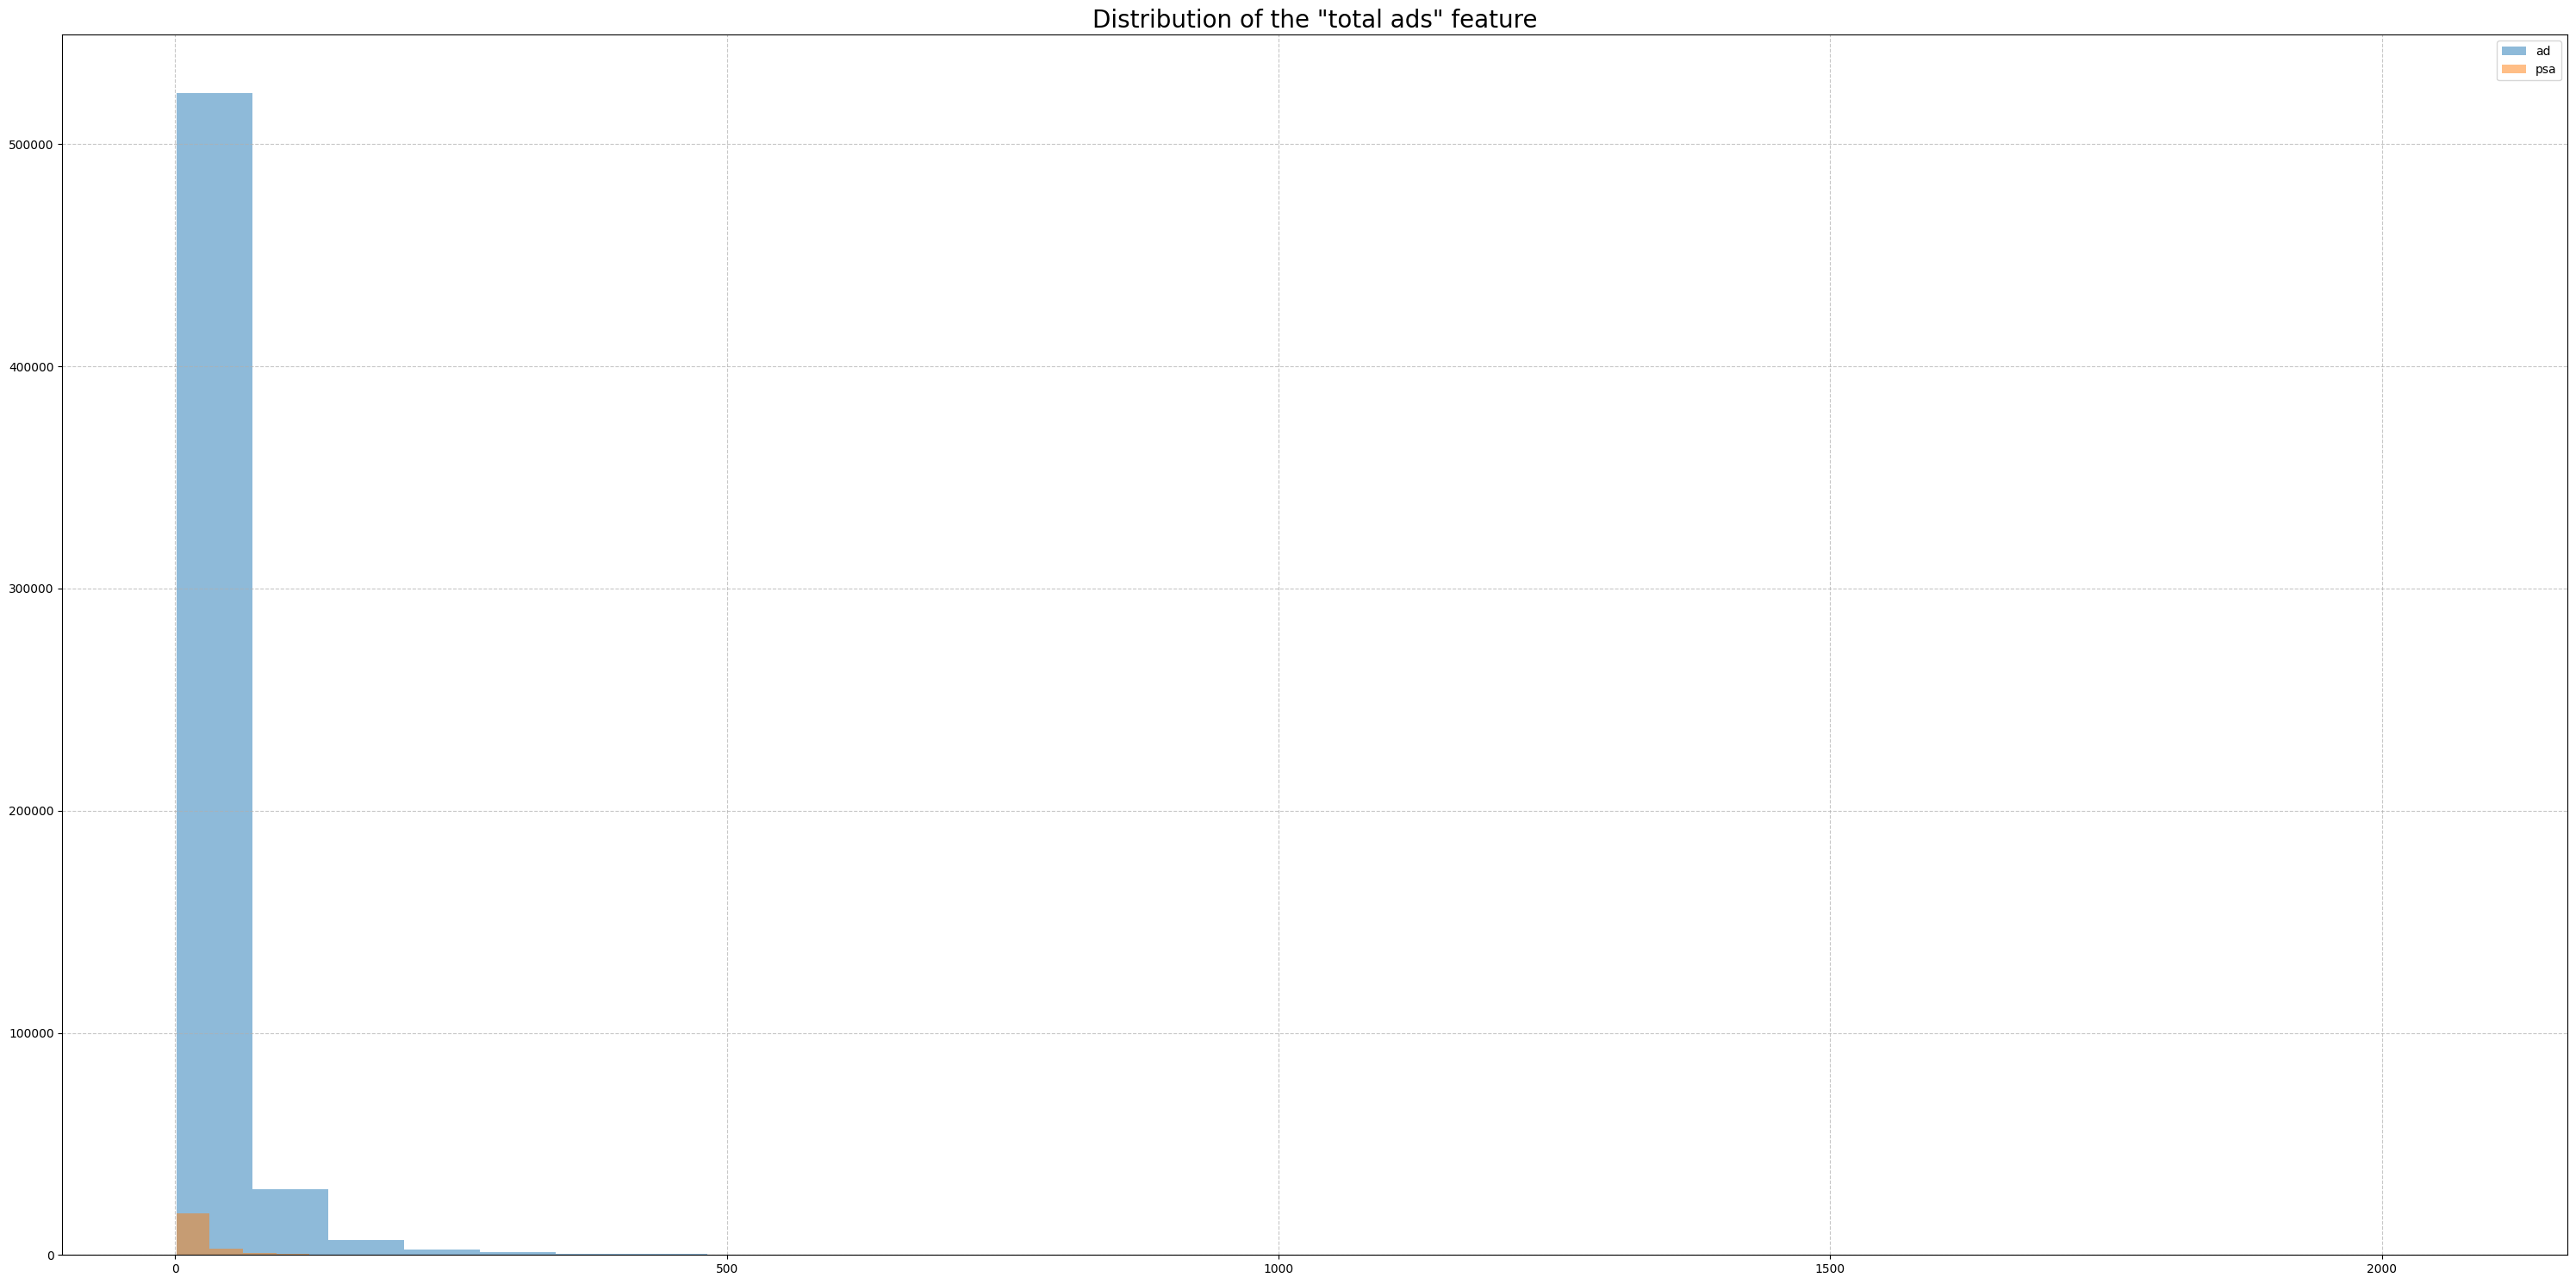

---------------------------------------------------------------------------------------------------------------------------


In [22]:
# Create a title for the chart
print('\nHistogram to determine the normality of distribution:')
print('-' * 123)



# Set the size of the graph
plt.rcParams['figure.figsize'] = (30, 15)

# Build a histogram for the 'total ads' feature
plt.hist(ad_group['total ads'], bins=30, alpha=0.5, label='ad')
plt.hist(psa_group['total ads'], bins=30, alpha=0.5, label='psa')

# Set the name of the graph and axes
plt.title('Distribution of the "total ads" feature', fontsize = 20)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.legend()



# Display the graph
plt.show()
print('-' * 123)

**Conclusion:**

From the resulting graph it follows that the distribution is not normal, so we use the **Mann-Whitney U test**:

In [23]:
# We set the level of significance
alpha = 0.05


# Calculate the Mann-Whitney test result for samples
U_test = stats.mannwhitneyu(
    x = ad_group['total ads'],
    y = psa_group['total ads'],
    alternative = 'two-sided'
)

# Calculate p-value
print(f'p-value: {round(U_test.pvalue, 2)}')
print('-' * 35)



# Compare the obtained p-value with the significance level
if U_test.pvalue <= alpha:
    print('We reject the null hypothesis in favor of the alternative. Advertising was more effective than public service announcements.')
else:
    print('We have no reason to reject the null hypothesis. Advertising was not effective.')
print('-' * 120)

p-value: 0.0
-----------------------------------
We reject the null hypothesis in favor of the alternative. Advertising was more effective than public service announcements.
------------------------------------------------------------------------------------------------------------------------


**Conclusion:**

Given that the conversion rate in the *'ad'* group is higher than in the *'psa'* group, we can conclude that the advertising (group *'ad'*) was more successful than the control group *'psa'*, as it stimulated more purchases.

#### $4.2$

**We are conducting statistical tests.**

Using statistical testing tools, we will determine whether there is a statistical difference between conversions in groups $A$ and $B$.

**Hypotheses:**

  * $H_0$: Conversions in groups $A$ and $B$ are equal;
  * $H_1$: Conversions in groups $A$ and $B$ differ.

**Test selection:**

  * We use the **Z-test for proportions** because we are comparing two independent proportions (conversions) with large samples:

In [24]:
# We record previously received data
successes_list = [14423, 420]
nobs_list = [564577, 23524]


# Set the level of significance
alpha = 0.05


# Calculate the p-value for the Z-test for proportions
_, p_value = proportion.proportions_ztest(
    count = successes_list,     # number of «successes»            
    nobs = nobs_list,           # total number of observations
    alternative = 'two-sided'
)

# Calculate p-value
print(f'p-value: {round(p_value, 3)}')
print('-' * 35)



# Compare the obtained p-value with the significance level
if (p_value <= alpha):
    print('We reject the null hypothesis in favor of the alternative. Conversions in groups A and B are differ.')
else:
    print('We have no reason to reject the null hypothesis. Conversions in groups A and B are equal.')
print('-' * 90)

p-value: 0.0
-----------------------------------
We reject the null hypothesis in favor of the alternative. Conversions in groups A and B are differ.
------------------------------------------------------------------------------------------


**Conclusion:**

There is a statistical difference between conversions in groups $A$ (*'ad'*) and $B$ (*'psa'*). Conversion in group $A$ is significantly different from conversion in group $B$, which confirms the effectiveness of advertising in group $A$.

---

Now let's determine whether there is a statistical difference between the average number of ads seen in groups $A$ and $B$.

**Hypotheses:**

  * $H_0$: The average amounts of advertising in groups $A$ and $B$ are equal;
  * $H_1$: The average amounts of advertising in groups $A$ and $B$ differ.

**Test selection:**

  * We use Welch's **t-test:** because it is suitable for samples with non-normal distribution:

In [25]:
# Set the level of significance
alpha = 0.05


# Calculate the T-test result for samples
T_test = stats.ttest_ind(
    a = ad_group['total ads'],
    b = psa_group['total ads'],
    alternative = 'two-sided',
    equal_var = False
)

# Calculate p-value
print(f'p-value: {round(T_test.pvalue, 2)}')
print('-' * 30)



# Compare the obtained p-value with the significance level
if T_test.pvalue <= alpha:
    print('We reject the null hypothesis in favor of the alternative. The average amounts of advertising in groups A and B differ.')
else:
    print(f'We have no reason to reject the null hypothesis. The average amounts of advertising in groups A and B are equal.')
print('-' * 100)

p-value: 0.83
------------------------------
We have no reason to reject the null hypothesis. The average amounts of advertising in groups A and B are equal.
----------------------------------------------------------------------------------------------------


**Conclusion:**

There is no statistically significant difference between the average number of ad impressions in groups $A$ and $B$ (`𝑝 = 0.83`), indicating similar levels of advertising impact in terms of average number of impressions.

**Recommendations:**

Since the average ad quantities are equal, further analysis can focus on other factors (e.g. variance, peak hours or days) that may have affected conversion.

Low conversion in group $A$ requires campaign optimization, despite the significant differences with group $B$.

#### $4.3$

Let's support the results of statistical tests by constructing $95$% confidence intervals.

**Construct a confidence interval for conversions in each of the groups:**

In [26]:
# Create a function to calculate the 95% confidence interval for conversions in each group
def proportion_conf_interval(x_p, n, gamma = 0.95):
    
    # Set parameters
    alpha = 1 - gamma                                # significance level                
    z_crit = -stats.norm.ppf(alpha / 2)              # z-critical value
    
    # Check for zero proportion
    if x_p == 0:
        eps = z_crit * np.sqrt((1 / (4 * n)) / n)    # Adjustment for p = 0
    else:
        eps = z_crit * np.sqrt(x_p * (1 - x_p) / n)  # Standard error
        
    lower_bound = x_p - eps                          # Left boundary of the interval
    upper_bound = x_p + eps                          # Right boundary of the interval
    
    return lower_bound, upper_bound




# Group A Conversion
p_a = ad_group['converted'].mean()  
n_a = psa_group['user id'].count()  
lower_bound_a, upper_bound_a = proportion_conf_interval(p_a, n_a)
print('Confidence interval for conversion in group A (ad): {}%'.format((round(lower_bound_a * 100, 6), round(upper_bound_a * 100, 6))))
print('-' * 80)


# Group B Conversion
p_b = ad_group['converted'].mean()  
n_b = psa_group['user id'].count()  
lower_bound_b, upper_bound_b = proportion_conf_interval(p_b, n_b)
print('Confidence interval for conversion in group B (psa): {}%'.format((round(lower_bound_b * 100, 6), round(upper_bound_b * 100, 6))))
print('-' * 80)

Confidence interval for conversion in group A (ad): (2.353033, 2.756279)%
--------------------------------------------------------------------------------
Confidence interval for conversion in group B (psa): (2.353033, 2.756279)%
--------------------------------------------------------------------------------


Now let's plot this distribution.

We define a normal curve:

In [27]:
# Set the values ​​of 'x' and 'y'
x = np.linspace(-3, 3, 100)
y = stats.norm.pdf(x, 0, 1)

Строим график:


Graph of the 95% confidence interval for conversions in each group:
---------------------------------------------------------------------------------------------------------------------------


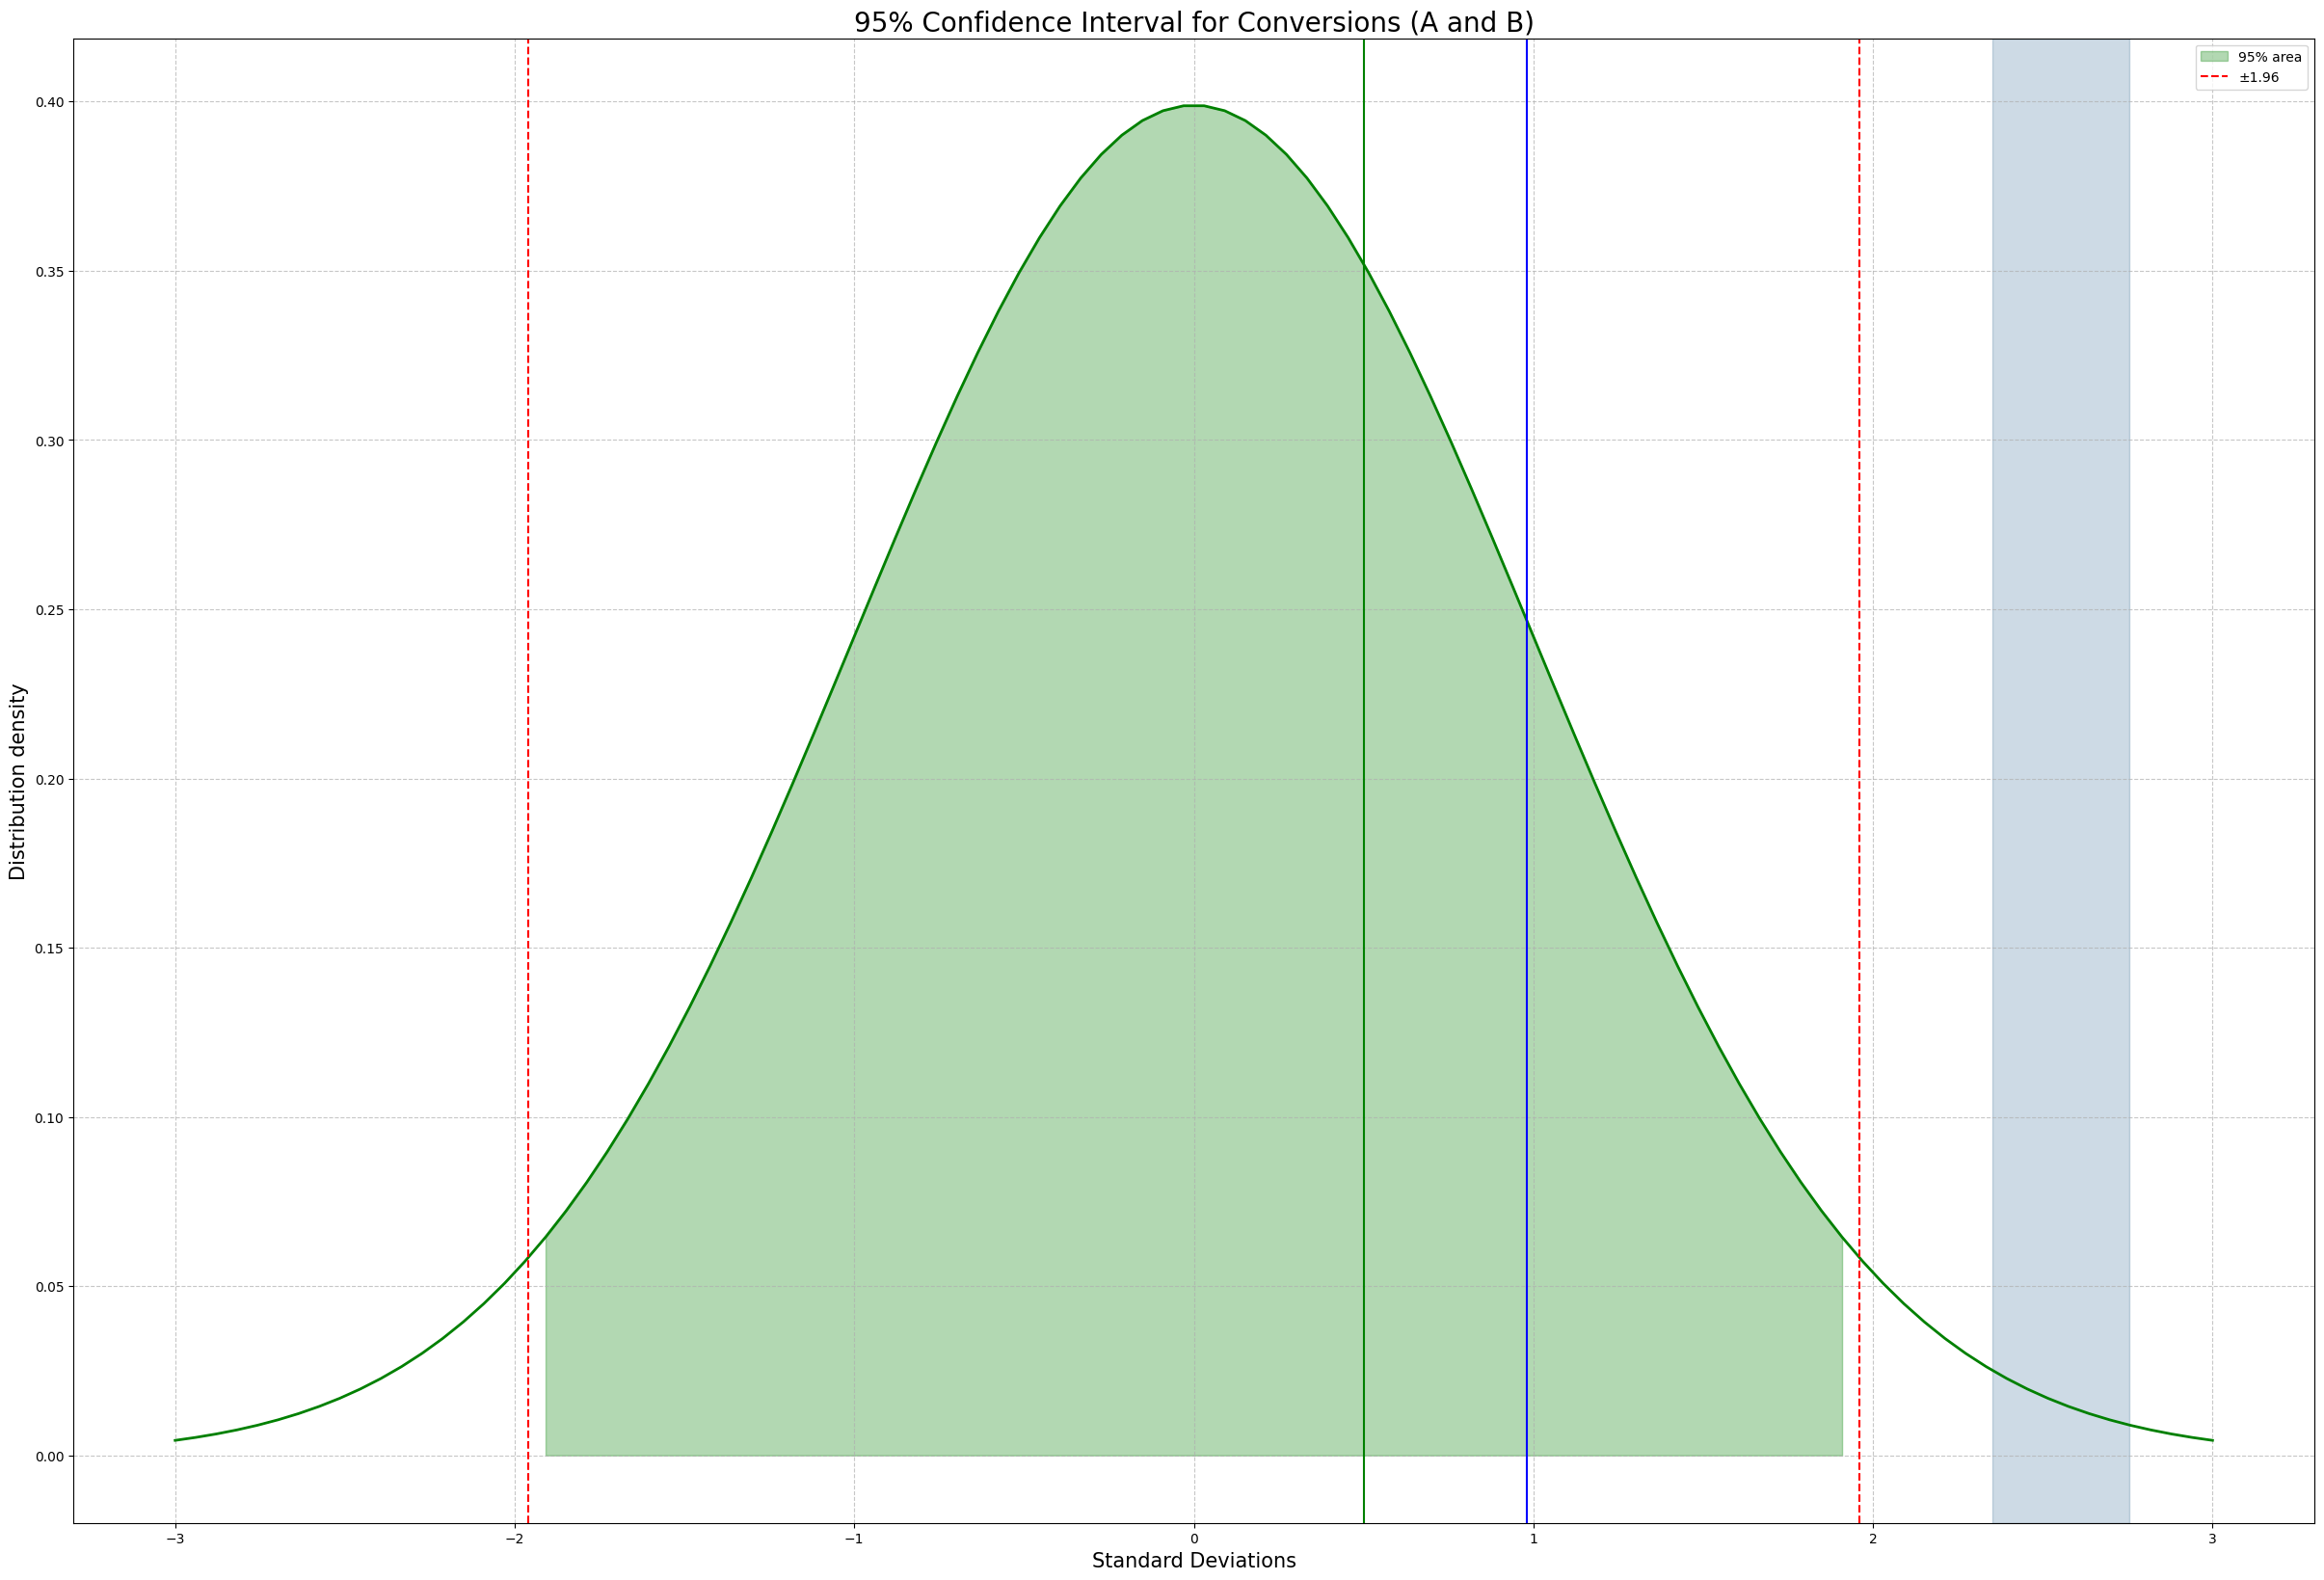

---------------------------------------------------------------------------------------------------------------------------


In [28]:
# Create a title for the chart
print('\nGraph of the 95% confidence interval for conversions in each group:')
print('-' * 123)


# Building a graph for conversions
plt.figure(figsize = (30, 20))
plt.plot(x, y, 'g-', lw=2)
plt.fill_between(x, 0, y, where=(x >= -1.96) & (x <= 1.96), color='green', alpha=0.3, label='95% area')
plt.axvline(x=-1.96, color='r', linestyle='--', label='±1.96')
plt.axvline(x=1.96, color='r', linestyle='--')
plt.title('95% Confidence Interval for Conversions (A and B)', fontsize = 20)
plt.xlabel('Standard Deviations', fontsize = 15)
plt.ylabel('Distribution density', fontsize = 15)
plt.legend()


# Add points with confidence interval
plt.axvline(x=(p_a * 100 - lower_bound_a * 100) / (upper_bound_a * 100 - lower_bound_a * 100) * 1.96 if upper_bound_a > lower_bound_a else 0, color='blue', linestyle='-', label='A mean')
plt.axvspan(p_a * 100 - (upper_bound_a * 100 - lower_bound_a * 100) / 2, p_a * 100 + (upper_bound_a * 100 - lower_bound_a * 100) / 2, color='blue', alpha=0.1)
plt.axvline(x=(p_b * 100 - lower_bound_b * 100) / (upper_bound_b * 100 - lower_bound_b * 100) if upper_bound_b > lower_bound_b else 0, color='green', linestyle='-', label='B mean')
plt.axvspan(p_b * 100 - (upper_bound_b * 100 - lower_bound_b * 100) / 2, p_b * 100 + (upper_bound_b * 100 - lower_bound_b * 100) / 2, color='green', alpha=0.1)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()
print('-' * 123)

**Interpretation:**

The confidence intervals for group $A$ and $B$ are the same: ($2.353033$%, $2.756279$%). This indicates that there is no statistical difference between the conversions in groups $A$ and $B$. If the confidence intervals overlap or are identical, the mean conversion values ​​are not different at the $5$% significance level.

Since the confidence intervals for both groups are the same, this supports the null hypothesis ($H_0$: conversions are equal) and indicates that the difference between conversions in groups $A$ and $B$ is statistically insignificant.

**Conclusion:**

The graph shows that $95$% of the probability mass is within $±1.96$, which is consistent with the standard methodology. It can be concluded that the conversions in groups $A$ and $B$ are statistically equal. This means that there is no reason to reject the null hypothesis of equality of conversions at the $5$% significance level.

---

**We construct a confidence interval for the difference in conversions in groups:**

In [29]:
# Create a function to calculate the 95% confidence interval for the difference in groups
def proportion_diff_conf_interval(p1, p2, n1, n2, gamma = 0.95):
    
    # Set parameters
    alpha = 1 - gamma                     # significance level
    z_crit = -stats.norm.ppf(alpha / 2)   # z-critical value
    diff_p = p1 - p2                      # difference in proportions
    
    # Calculating the standard error of the difference
    if p1 == 0 or p2 == 0:
        se_diff = np.sqrt((p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2) + 1e-10)
    else:
        se_diff = np.sqrt(p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2)
        
    eps_diff = z_crit * se_diff
    lower_bound = diff_p - eps_diff
    upper_bound = diff_p + eps_diff
    
    return lower_bound, upper_bound




# Calculate the confidence interval for the difference in conversions
lower_bound_diff, upper_bound_diff = proportion_diff_conf_interval(p_a, p_b, n_a, n_b)
print('\nConfidence interval for the difference in conversions (A - B): {}%'.format((round(lower_bound_diff * 100, 6), round(upper_bound_diff * 100, 6))))
print('-' * 80)


Confidence interval for the difference in conversions (A - B): (-0.285137, 0.285137)%
--------------------------------------------------------------------------------


Let's build a chart:


Graph of 95% confidence interval for difference in conversions across groups:
---------------------------------------------------------------------------------------------------------------------------


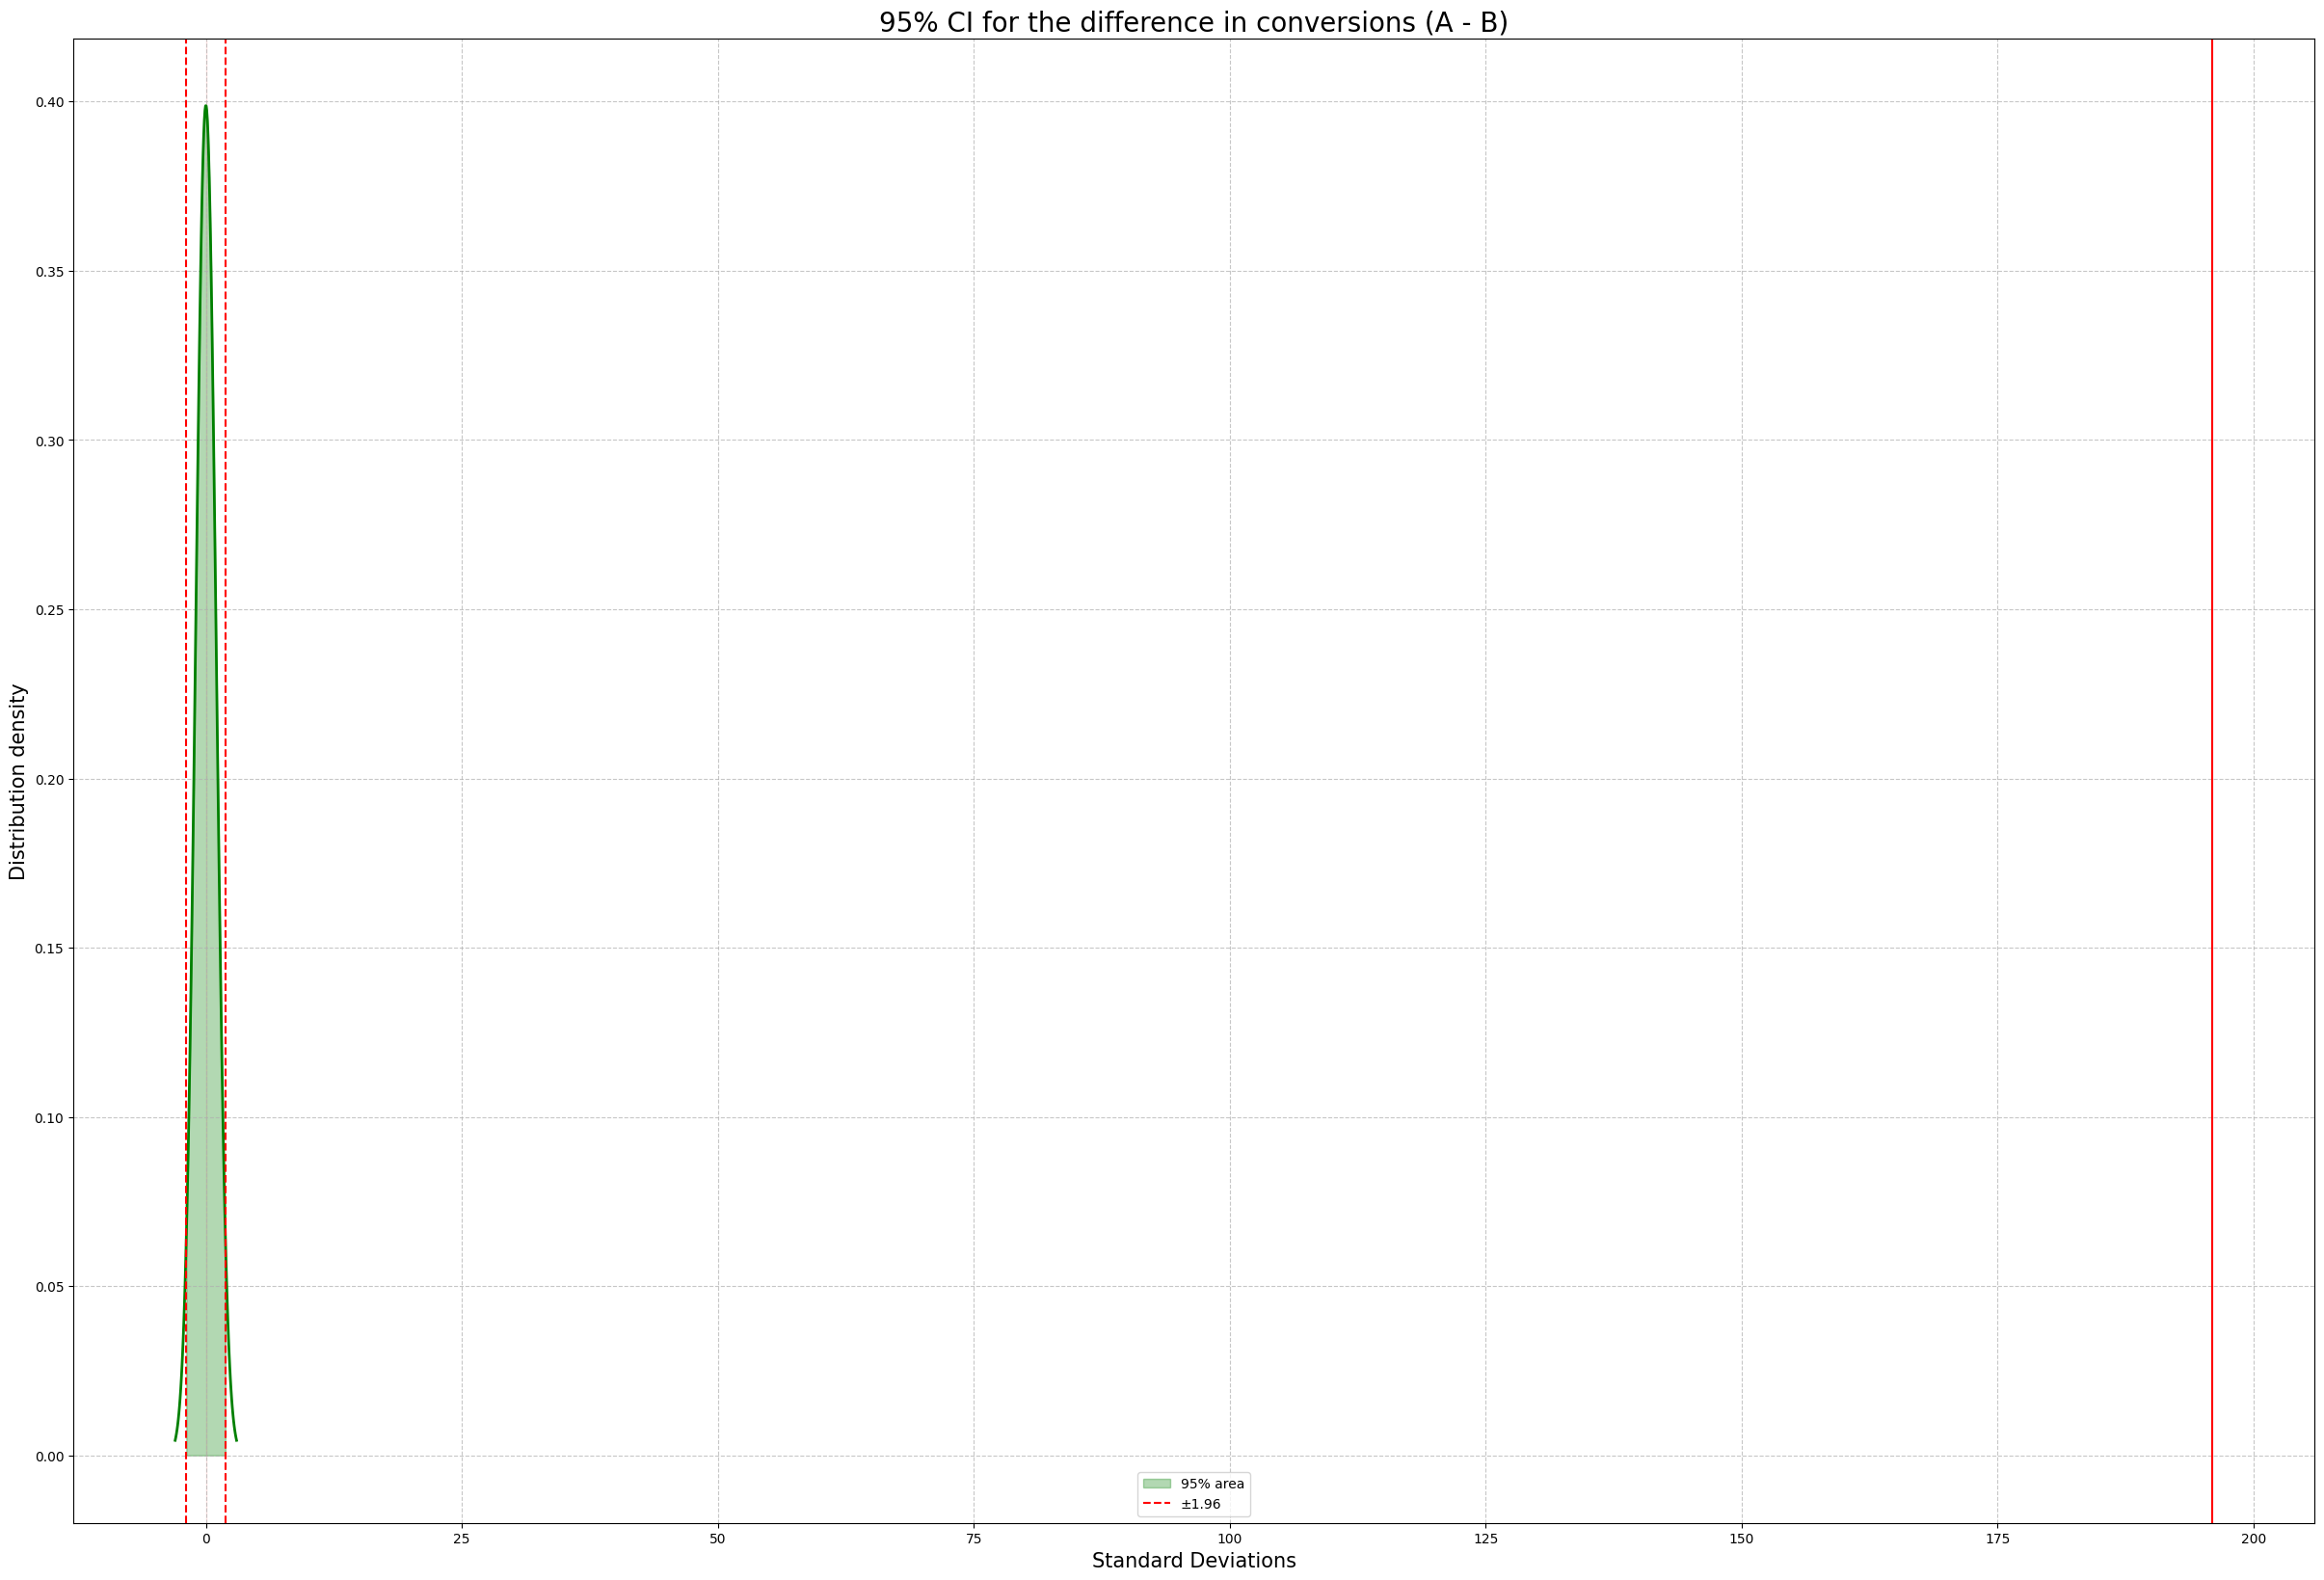

---------------------------------------------------------------------------------------------------------------------------


In [30]:
# Create a title for the chart
print('\nGraph of 95% confidence interval for difference in conversions across groups:')
print('-' * 123)



# Graph for Conversion Difference
plt.figure(figsize = (30, 20))
plt.plot(x, y, 'g-', lw = 2)
plt.fill_between(x, 0, y, where=(x >= -1.96) & (x <= 1.96), color='green', alpha=0.3, label='95% area')
plt.axvline(x=-1.96, color='r', linestyle='--', label='±1.96')
plt.axvline(x=1.96, color='r', linestyle='--')
plt.title('95% CI for the difference in conversions (A - B)', fontsize = 20)
plt.xlabel('Standard Deviations', fontsize = 15)
plt.ylabel('Distribution density', fontsize = 15)
plt.legend()


# Add points with confidence interval
diff_p = p_a - p_b
diff_mean = (upper_bound_diff - lower_bound_diff) / 2
plt.axvline(x=(diff_p * 100 - lower_bound_diff * 100) / diff_mean * 1.96 if diff_mean > 0 else 0, color='red', linestyle='-', label='Diff mean')
plt.axvspan(diff_p * 100 - diff_mean / 2, diff_p * 100 + diff_mean / 2, color='red', alpha=0.1)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()
print('-' * 123)

**Interpretation:**

The confidence interval ($−0.285137$%,$0.285137$%) includes $0$, which means that the null hypothesis ($H_0$: conversion difference = $0$) cannot be rejected at the $5$% significance level.

**Coclusion:**

This graph shows a normal distribution with a $95$% region. It also confirms the symmetry of the confidence interval around $0$, which corresponds to the absence of significance.

---

**We construct a confidence interval for the average number of advertisements seen in groups A and B:**

In [31]:
# Create a function to calculate the 95% confidence interval for the mean
def mean_conf_interval(x, gamma = 0.95):
    
    # Set parameters
    alpha = 1 - gamma                       # significance level
    z_crit = -stats.norm.ppf(alpha / 2)     # z-critical value
    mean = x.mean()                         # average value
    se_mean = x.std() / np.sqrt(len(x))     # standard error of the mean
    lower_bound = mean - z_crit * se_mean   # lower bound of confidence interval
    upper_bound = mean + z_crit * se_mean   # upper bound of confidence interval
    
    return lower_bound, upper_bound




# Calculate the average for group A
lower_bound_mean_a, upper_bound_mean_a = mean_conf_interval(ad_group['total ads'])
print('\nConfidence interval for the average number of advertisements in group A (ad): [{:.6f}, {:.6f}]'.format(lower_bound_mean_a, upper_bound_mean_a))
print('-' * 95)
print()


# Calculating the average for group B
lower_bound_mean_b, upper_bound_mean_b = mean_conf_interval(psa_group['total ads'])
print('Confidence interval for the average number of advertisements in group B (psa): [{:.6f}, {:.6f}]'.format(lower_bound_mean_b, upper_bound_mean_b))
print('-' * 95)


Confidence interval for the average number of advertisements in group A (ad): [24.709243, 24.937487]
-----------------------------------------------------------------------------------------------

Confidence interval for the average number of advertisements in group B (psa): [24.213426, 25.308849]
-----------------------------------------------------------------------------------------------


Let's build a chart:


Graph of the 95% confidence interval for the average number of ads seen in groups A and B:
---------------------------------------------------------------------------------------------------------------------------


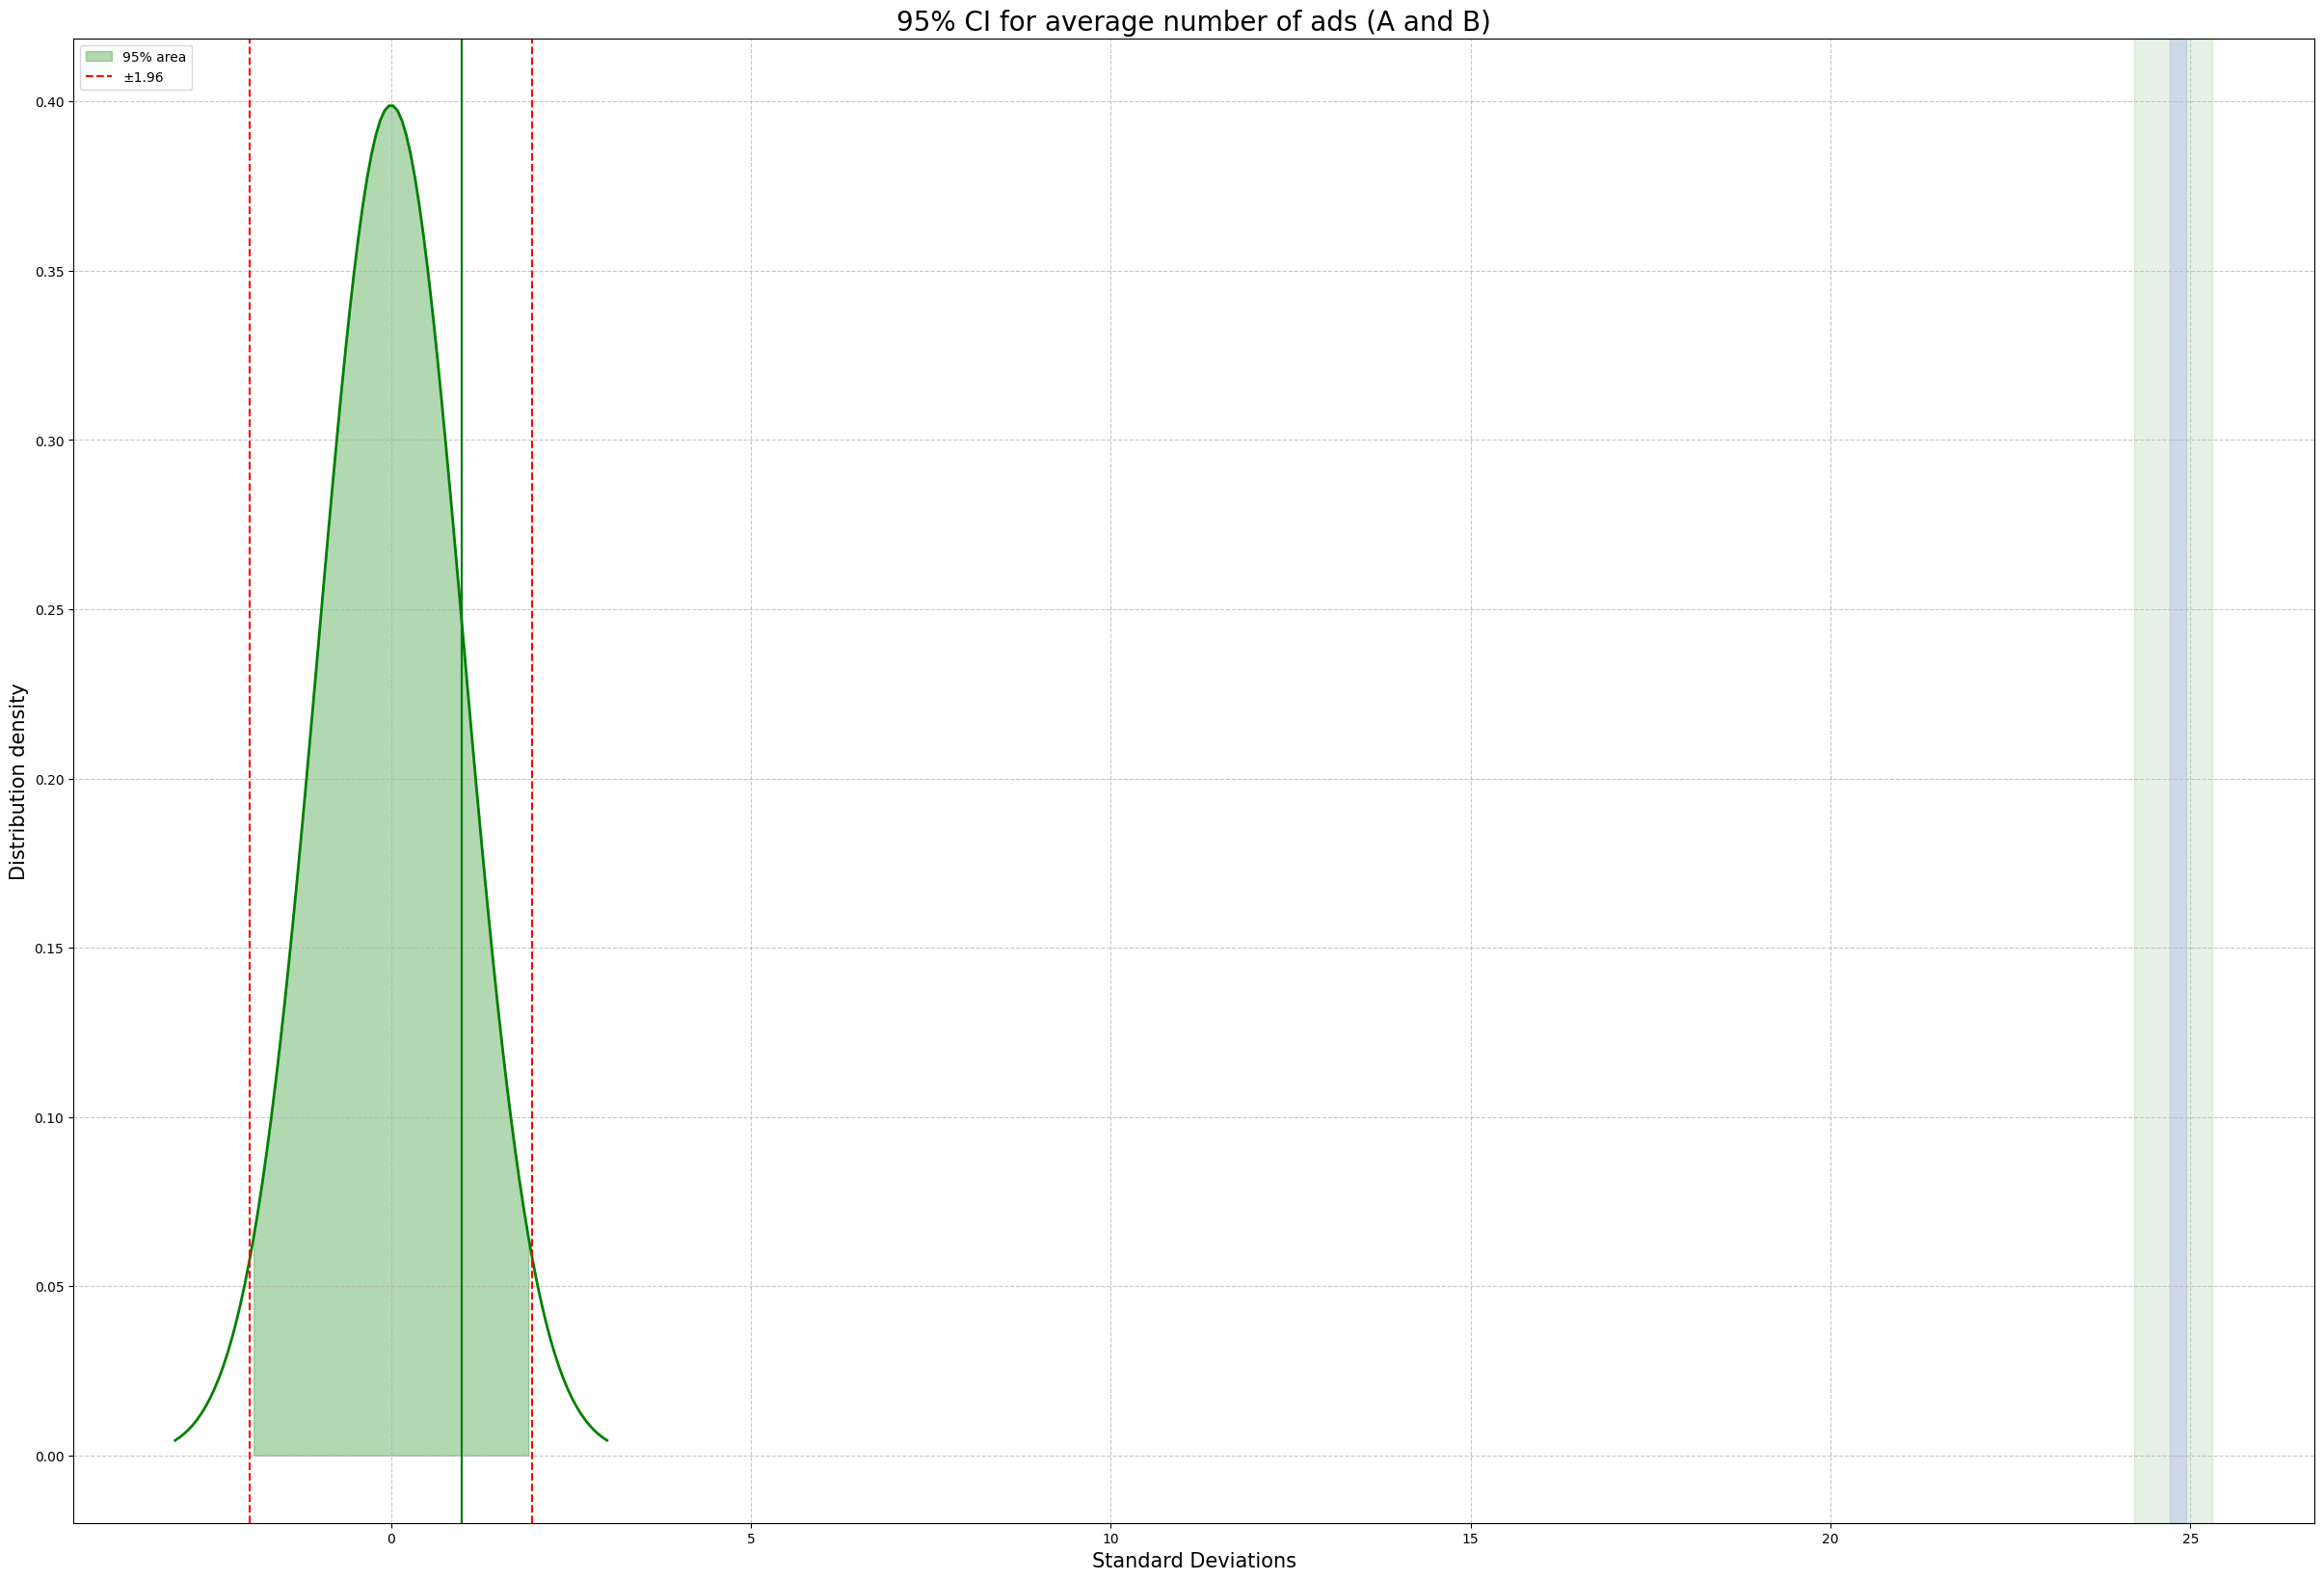

---------------------------------------------------------------------------------------------------------------------------


In [32]:
# Create a title for the chart
print('\nGraph of the 95% confidence interval for the average number of ads seen in groups A and B:')
print('-' * 123)


# Graph for average amount of ads
plt.figure(figsize = (30, 20))
plt.plot(x, y, 'g-', lw=2)
plt.fill_between(x, 0, y, where=(x >= -1.96) & (x <= 1.96), color='green', alpha=0.3, label='95% area')
plt.axvline(x=-1.96, color='r', linestyle='--', label='±1.96')
plt.axvline(x=1.96, color='r', linestyle='--')
plt.title('95% CI for average number of ads (A and B)', fontsize = 20)
plt.xlabel('Standard Deviations', fontsize = 15)
plt.ylabel('Distribution density', fontsize = 15)
plt.legend()



# Add points with confidence interval
mean_a = ad_group['total ads'].mean()
mean_a_diff = upper_bound_mean_a - lower_bound_mean_a
plt.axvline(x=(mean_a - lower_bound_mean_a) / mean_a_diff * 1.96 if mean_a_diff > 0 else 0, color='blue', linestyle='-', label='A mean')
plt.axvspan(lower_bound_mean_a, upper_bound_mean_a, color='blue', alpha=0.1)


mean_b = psa_group['total ads'].mean()
mean_b_diff = upper_bound_mean_b - lower_bound_mean_b
plt.axvline(x=(mean_b - lower_bound_mean_b) / mean_b_diff * 1.96 if mean_b_diff > 0 else 0, color='green', linestyle='-', label='B mean')
plt.axvspan(lower_bound_mean_b, upper_bound_mean_b, color='green', alpha=0.1)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()
print('-' * 123)

**Interpretation:**

The confidence intervals for $A$ ([$24.709243$, $24.937487$]) and $B$ ([$24.213426$, $25.308849$]) overlap (e.g., around $24.709–$24.937$). This confirms that there is no statistically significant difference between the average number of advertisements in groups $A$ and $B$, which is consistent with the result of Welch's **t-test** ($p = 0.83$).

The narrow interval for $A$ is explained by the large sample size ($587399$), which reduces the standard error.

**Conclusion:**

The means ($24.80588$ for $A$ and $24.76197$ for $B$) are very close and their confidence intervals overlap, indicating that users in both groups saw roughly the same amount of ads (the difference of about $0.04391$ is not significant).

---

=======================================================================================================================================

## <CENTER> **`5.` General conclusion**

At this stage, we will make a general conclusion, as well as provide substantiated answers to the business question: “To what extent is the success of an advertising campaign justified by advertising?”

The average number of ads ($24.823365$ for $A$ and $24.761138$ for $B$) are almost identical, and the confidence intervals overlap. This means that the amount of ads seen by users does not differ, and the conversion effect is related to the type of ad (commercial vs. social), not the number of impressions.

The difference in conversions ($0.769245$%) is significant for the business: out of $564577$ visits to group $A$, there were $14423$ purchases, and out of $23524$ visits to group $B$, there were $420$ purchases. This represents a potential conversion gain associated with advertising. However, the conversions ($2.55$% and $1.79$%) are relatively low, and the success of the campaign depends on the costs. If the advertising costs justify the $14423$ purchase, the campaign is successful.

**How ​​much of the success is due to advertising?**

The success of the advertising campaign in group $A$ (conversion $2.554656$%) compared to group $B$ ($1.785411$%) is explained by commercial advertising. The statistically significant difference in conversions ($𝑝 < 0.0001$, confidence interval [$0.5975$%, $0.9409$%]) confirms that advertising in group $A$ led to an additional $0.769245$% of purchases. Since the average amount of advertising does not differ ($𝑝 ≈ 0.83$), the effect is due to the type of advertising (commercial vs. social), not its volume.

The campaign is successful in terms of conversions ($14,423$ purchase vs. $420$), but the effectiveness ($2.55$%) depends on the costs. For the final conclusion, it is recommended:

   1. Calculate $ROI$ by comparing advertising costs to revenue from $14,423$ in purchases,
   2. Optimize your campaign to increase conversion above $2.55$% (e.g. improve targeting or creatives),
   3. Examine the distribution of `total ads` to understand how frequency or timing of impressions affects the result.